In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## We have six datasets.

### First Dataset: Buildings with Kitchen (Inventory of campus buildings and rooms with kitchens)

##### This dataset contains information regarding the different buildings at Boston University including their address, the type, whether the building contains mechanical ventilation, etc.

In [13]:
df = pd.read_csv("Buildings.csv")
df.head(5)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Street 2 Number,Street 2 Address,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,Undergraduate,YES,NaN,NaN,No,25.0,NaN,NaN,25.0
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,YES,785,COMMONWEALTH AVENUE,Yes,0.0,0.0,0.0,0.0
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,Undergraduate,YES,NaN,NaN,Yes,817.0,NaN,NaN,817.0
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,Other,YES,NaN,NaN,Partial,5.0,5.0,NaN,NaN
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,YES,NaN,NaN,Yes,0.0,0.0,0.0,0.0


##### First, we will take a look at the columns/variables.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Site Code                             300 non-null    object 
 1   Building Code                         300 non-null    object 
 2   Building Description                  300 non-null    object 
 3   Building Name                         82 non-null     object 
 4   Building Type                         300 non-null    object 
 5   Residential Group                     201 non-null    object 
 6   Residential Building Type             201 non-null    object 
 7   Housing Type                          201 non-null    object 
 8   Maintained by BU FMO                  300 non-null    object 
 9   Street 2 Number                       12 non-null     object 
 10  Street 2 Address                      12 non-null     object 
 11  Mechanical Ventilat

Initial Questions To Consider:

This dataset contains 16 columns (variables).

This dataset has 300 rows (observations), indicating there are 300 buildings.

There are both categorical and numerical variables. At quick glance there seems to be more categorical variables than numerical variables.

Categorical Variables: Building Type, Housing Type, Maintained by BU FMO, Mechanical Ventilation, etc.

Numerical Variables: Residential Capacity

### Data Completion

Information on how much data is provided

In [15]:
df.isnull().sum()

Site Code                                 0
Building Code                             0
Building Description                      0
Building Name                           218
Building Type                             0
Residential Group                        99
Residential Building Type                99
Housing Type                             99
Maintained by BU FMO                      0
Street 2 Number                         288
Street 2 Address                        288
Mechanical Ventilation                    3
Residential Capacity                      6
Residential Capacity - Faculty/Staff    166
Residential Capacity - Graduate         157
Residential Capacity - Undergrad         64
dtype: int64

Some of the data is missing from the dataset.

Columns with missing data points: Building Name, Residential Group, Residential Building Type, Housing Type, Street 2 Number, Street 2 Address, Mechanical Ventilation, Residential Capacity, Residential Capacity - Faculty/Staff, Residential Capacity - Graduate, Residential Capacity - Undergrad

However, even if some of the data point is missing, most of them are from insignificant columns.

### Data Cleaning

We can combine Street 2 Number and Street 2 Address, if they are not missing (not NaN) into one column.

In [16]:
df['Street 2 Combined Address'] = df['Street 2 Number'].astype(str) + " " +  df['Street 2 Address'].astype(str)
df.drop(['Street 2 Number', 'Street 2 Address'], axis=1, inplace=True)
df = df.replace('nannan', np.nan)
df.head()

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,Undergraduate,YES,No,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,YES,Yes,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,Undergraduate,YES,Yes,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,Other,YES,Partial,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,YES,Yes,0.0,0.0,0.0,0.0,nan nan


We can map some of the categorical variables into integers for easier view.

### Mechanical Ventiliation

1. If there is a mechanical ventilation, it is 1.0

2. If there is partial mechanical ventilation, it is 0.5

3. If there is no mechanical ventilation, it is 0.0

In [17]:
mapping = {'Yes': 1, 'No': 0, 'Partial': 0.5}

df['Mechanical Ventilation'] = df['Mechanical Ventilation'].map(mapping)
df.head(10)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,Undergraduate,YES,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,Undergraduate,YES,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,Other,YES,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
5,CRC,762,100 ASHFORD STREET,TRACK AND TENNIS CENTER,Athletic,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
6,CRC,714,100 BAY STATE ROAD,YAWKEY CENTER FOR STUDENT SERVICES,Student Support,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,Undergraduate,YES,0.0,3.0,NaN,NaN,3.0,nan nan
8,CRC,930,1010 COMMONWEALTH AVENUE,NaN,Academic,NaN,NaN,NaN,NO,1.0,0.0,0.0,0.0,0.0,nan nan
9,CRC,657,1019 COMMONWEALTH AVENUE,NaN,Residential,Housing,Large Dormitory-Style,Undergraduate,YES,1.0,274.0,NaN,NaN,274.0,nan nan


### Housing Type

1. If Undergraduate, it is 1

2. If Graduate, it is 2

3. If Mixed Use, it is 1.5

4. If Other, it is 3

No need to change NaN values

In [18]:
UniqueHousingType = df['Housing Type'].unique()
print(UniqueHousingType)

['Undergraduate' nan 'Other' 'Mixed Use' 'Graduate']


In [19]:
mappingTwo = {'Undergraduate': 1, 'Other': 3, 'Graduate': 2, 'Mixed Use': 1.5}
df['Housing Type'] = df['Housing Type'].map(mappingTwo)
df.head(10)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,YES,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,YES,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,YES,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
5,CRC,762,100 ASHFORD STREET,TRACK AND TENNIS CENTER,Athletic,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
6,CRC,714,100 BAY STATE ROAD,YAWKEY CENTER FOR STUDENT SERVICES,Student Support,NaN,NaN,NaN,YES,1.0,0.0,0.0,0.0,0.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,YES,0.0,3.0,NaN,NaN,3.0,nan nan
8,CRC,930,1010 COMMONWEALTH AVENUE,NaN,Academic,NaN,NaN,NaN,NO,1.0,0.0,0.0,0.0,0.0,nan nan
9,CRC,657,1019 COMMONWEALTH AVENUE,NaN,Residential,Housing,Large Dormitory-Style,1.0,YES,1.0,274.0,NaN,NaN,274.0,nan nan


### Maintained by BU FMO

1. If Yes, it is 1

2. If No, it is 0

In [20]:
mappingThree = {'YES':1, 'NO':0}
df['Maintained by BU FMO'] = df['Maintained by BU FMO'].map(mappingThree)
df.head(5)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan


## Now that we finished the mapping and cleaning of the dataset, we can now find the columns (variables) that we believe would help complete our main objective.

They are

1. Mechanical Ventilation - Whether the building contains air conditioning is an useful information (if there is air conditioning, high possibility that water bottle filling stations are not required)
2. Maintained by BU FMO - Maintenance of water filters will be useful
3. Residential Capacity - The number of people in the building can prioritize the water bottle filling stations (the more people, the higher prioritized)

We will first look at mechanical ventilation dataset.

In [21]:
df['Mechanical Ventilation'].value_counts()

0.0    209
1.0     75
0.5     10
Name: Mechanical Ventilation, dtype: int64

There are 209 buildings that do not mechanical ventilation, 75 buildings that have mechanical ventilation, and 10 buildings that have partial mechanical ventilation.

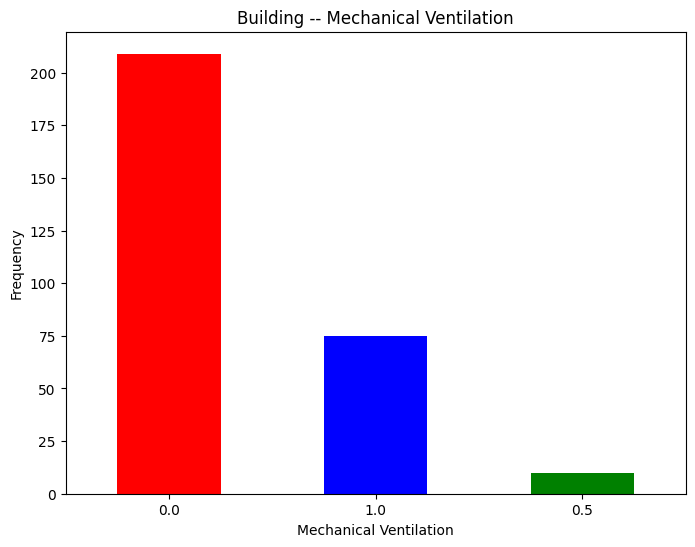

In [22]:
count = df['Mechanical Ventilation'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Building -- Mechanical Ventilation')
plt.xlabel('Mechanical Ventilation')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Now that we have the graph and mechanical ventilation is converted to a numerical value, we can also check the descriptive statistics.

In [23]:
df[['Mechanical Ventilation']].describe()

,Mechanical Ventilation
count,294.000000
mean,0.272109
std,0.436130
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


From the table, we can see that the average buildings listed do not have a mechanical ventilation.

The standard deviation for the column is 0.43613.

The inter-quartile range (IQR) is the difference between the 25% and 75% quantiles.

We can also find the mode and the median.

In [24]:
df['Mechanical Ventilation'].mode()

0    0.0
Name: Mechanical Ventilation, dtype: float64

In [25]:
df['Mechanical Ventilation'].median()

0.0

Both the mode and median tells that most of the buildings provided do not have a mechanical ventilation. These buildings should be prioritized when it comes to building a water bottle station.

Here is another version of the graph of the Mechanical ventilation.

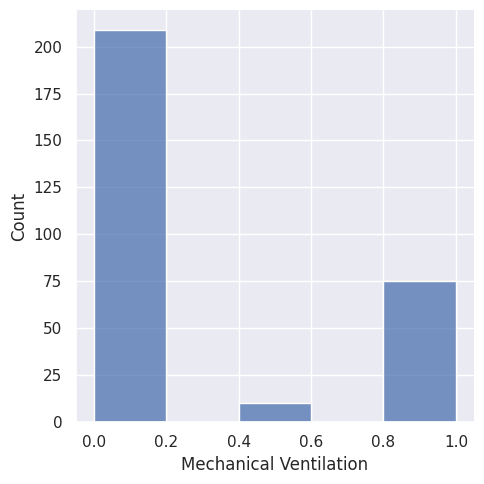

In [26]:
sns.set_theme()
sns.displot(df[['Mechanical Ventilation']], x="Mechanical Ventilation", binwidth=0.2)

We can also filter the columns. Since we need to prioritize buildings without mechanical ventilation, we can choose those buildings.

In [27]:
filterByVentilaiton_df = df[df['Mechanical Ventilation'] == 0.0]
filterByVentilaiton_df.head(10)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,3.0,NaN,NaN,3.0,nan nan
10,CRC,775,1053 BEACON STREET,NaN,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
11,CRC,555,11 BAY STATE ROAD,NaN,Residential,Rental,Apartment Style,3.0,1,0.0,8.0,8.0,NaN,NaN,nan nan
12,CRC,670,11 BUSWELL STREET,NaN,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,22.0,NaN,NaN,22.0,nan nan
13,CRC,734,110 BAY STATE ROAD,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,12.0,NaN,NaN,12.0,nan nan
17,CRC,506,112 BAY STATE ROAD,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,11.0,NaN,NaN,11.0,nan nan
19,CRC,825,115 BAY STATE ROAD,NaN,Residential,Housing,Apartment Style,1.5,1,0.0,16.0,NaN,NaN,16.0,nan nan
20,CRC,504,116 BAY STATE ROAD,NaN,Academic,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,nan nan
21,CRC,563,117 BAY STATE ROAD,KILACHAND HONORS HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,27.0,NaN,NaN,27.0,nan nan


We can also group the buildings based on whether they have mechanical ventilation, partial mechanical ventilation, or no mechanical ventilation.

In [28]:
group_by_mechanical_ventilation_df = df.groupby(['Mechanical Ventilation'])
group_by_mechanical_ventilation_df.head(5)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
5,CRC,762,100 ASHFORD STREET,TRACK AND TENNIS CENTER,Athletic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
6,CRC,714,100 BAY STATE ROAD,YAWKEY CENTER FOR STUDENT SERVICES,Student Support,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,3.0,NaN,NaN,3.0,nan nan
10,CRC,775,1053 BEACON STREET,NaN,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
11,CRC,555,11 BAY STATE ROAD,NaN,Residential,Rental,Apartment Style,3.0,1,0.0,8.0,8.0,NaN,NaN,nan nan


We will now look at Maintained by BU FMO dataset.

In [29]:
df['Maintained by BU FMO'].value_counts()

1    292
0      8
Name: Maintained by BU FMO, dtype: int64

There are 292 buildings that are maintained by BU FMO and 8 buildings that are not maintained by BU FMO.

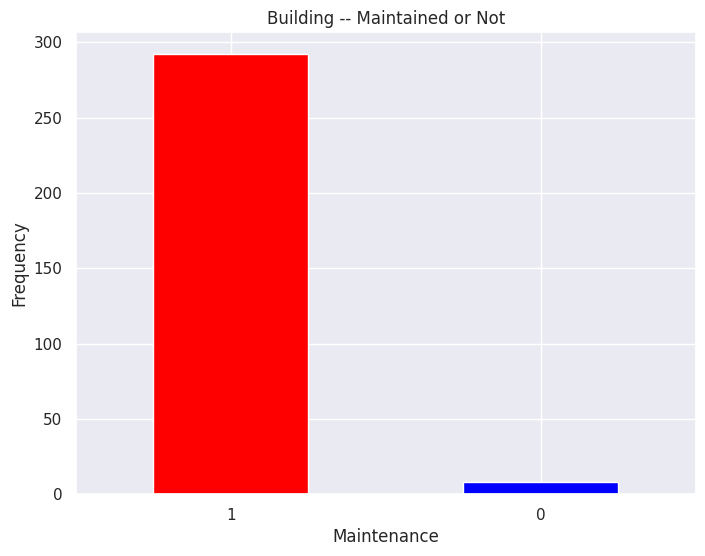

In [30]:
count = df['Maintained by BU FMO'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=['red', 'blue'])
plt.title('Building -- Maintained or Not')
plt.xlabel('Maintenance')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Now that we have the graph and Maintained by BU FMO is converted to a numerical value, we can also check the descriptive statistics.

In [31]:
df[['Maintained by BU FMO']].describe()

,Maintained by BU FMO
count,300.000000
mean,0.973333
std,0.161376
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


From the table, we can see that the average buildings listed are being maintained by BU FMO.

The standard deviation for the column is 0.161376.

The inter-quartile range (IQR) is the difference between the 25% and 75% quantiles.

We can also find the mode and the median.

In [32]:
df['Maintained by BU FMO'].mode()

0    1
Name: Maintained by BU FMO, dtype: int64

In [33]:
df['Maintained by BU FMO'].median()

1.0

Both the mode and median tells that most of the buildings are receiving maintenance. These buildings should be prioritized when it comes to building a water bottle station since water filters might require constant checks.

Here is another version of the graph of the Maintenance.

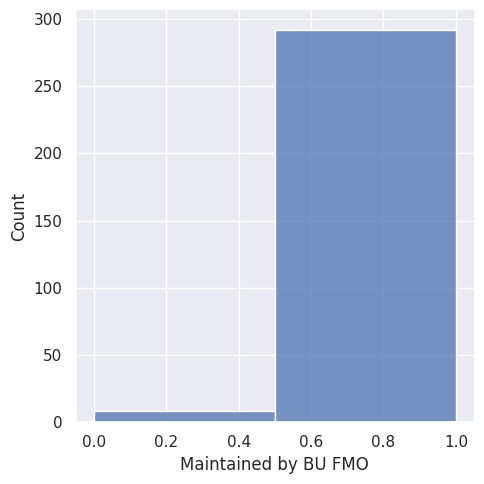

In [34]:
sns.set_theme()
sns.displot(df[['Maintained by BU FMO']], x="Maintained by BU FMO", binwidth=0.4)

We can also filter the columns. Since we need to prioritize buildings with maintenance, we can choose those buildings.

In [35]:
filterByVentilaiton_df = df[df['Maintained by BU FMO'] == 1]
filterByVentilaiton_df.head(10)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
5,CRC,762,100 ASHFORD STREET,TRACK AND TENNIS CENTER,Athletic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
6,CRC,714,100 BAY STATE ROAD,YAWKEY CENTER FOR STUDENT SERVICES,Student Support,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,3.0,NaN,NaN,3.0,nan nan
9,CRC,657,1019 COMMONWEALTH AVENUE,NaN,Residential,Housing,Large Dormitory-Style,1.0,1,1.0,274.0,NaN,NaN,274.0,nan nan
10,CRC,775,1053 BEACON STREET,NaN,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan


We can also group the buildings based on their maintenance status.

In [36]:
group_by_mechanical_ventilation_df = df.groupby(['Maintained by BU FMO'])
group_by_mechanical_ventilation_df.head(5)

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Residential Capacity - Faculty/Staff,Residential Capacity - Graduate,Residential Capacity - Undergrad,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,NaN,NaN,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,NaN,NaN,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,5.0,NaN,NaN,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,nan nan
8,CRC,930,1010 COMMONWEALTH AVENUE,NaN,Academic,NaN,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,nan nan
25,CRC,965,121 DUMMER STREET,PLEASANT VENTURES - D,Commercial,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,nan nan
253,CRC,568,83 IVY STREET,NaN,Residential,Rental,Apartment Style,3.0,0,0.0,4.0,4.0,NaN,NaN,nan nan
255,CRC,628,830-846 COMMONWEALTH AVENUE,NaN,Commercial,NaN,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,nan nan
278,CRC,937,888 COMMONWEALTH AVENUE,NaN,Academic,NaN,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,882-888 COMMONWEALTH AVENUE


We will now look at Residential Capacity dataset.

Since we do not care about whether the residents are undergraduate, graduate, or faculty (all of them are equally important), we will drop those columns.

In [37]:
df.drop(['Residential Capacity - Undergrad', 'Residential Capacity - Graduate', 'Residential Capacity - Faculty/Staff'],axis=1, inplace=True)
df.head()

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,nan nan
1,CRC,623,1 UNIVERSITY ROAD,BOSTON UNIVERSITY ACADEMY,Academic,NaN,NaN,NaN,1,1.0,0.0,785 COMMONWEALTH AVENUE
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,nan nan
4,CRC,677,10 LENOX STREET,NaN,Administrative,NaN,NaN,NaN,1,1.0,0.0,nan nan


In [38]:
df['Residential Capacity'].value_counts()

0.0      100
14.0      17
23.0      16
10.0      13
16.0       9
        ... 
629.0      1
612.0      1
610.0      1
521.0      1
289.0      1
Name: Residential Capacity, Length: 61, dtype: int64

There are 17 buildings that have the residency of 14, 16 buildings that have the residency of 23, and etc.

Since the residential capacity is a numeric value that ranges from a small number to a large number, we will first look at the specifics.

In [39]:
df[['Residential Capacity']].describe()

,Residential Capacity
count,294.000000
mean,41.850340
std,153.388634
min,0.000000
25%,0.000000
50%,11.500000
75%,23.000000
max,1795.000000


From the table, we can see that the residential capacity ranges from 0 people to 1795 people.

The standard deviation for the column is 153.39.

The mean number of residency is 41.85 people per building.

The inter-quartile range (IQR) is the difference between the 25% and 75% quantiles.

We can also find the mode and the median.

In [40]:
df['Residential Capacity'].mode()

0    0.0
Name: Residential Capacity, dtype: float64

In [41]:
df['Residential Capacity'].median()

11.5

Most of the data point suggests that the capacity of the building is 0, which means that data has either not been all collected (some are missing) or the building does not have any residential capacity.

We will now plot a histogram.

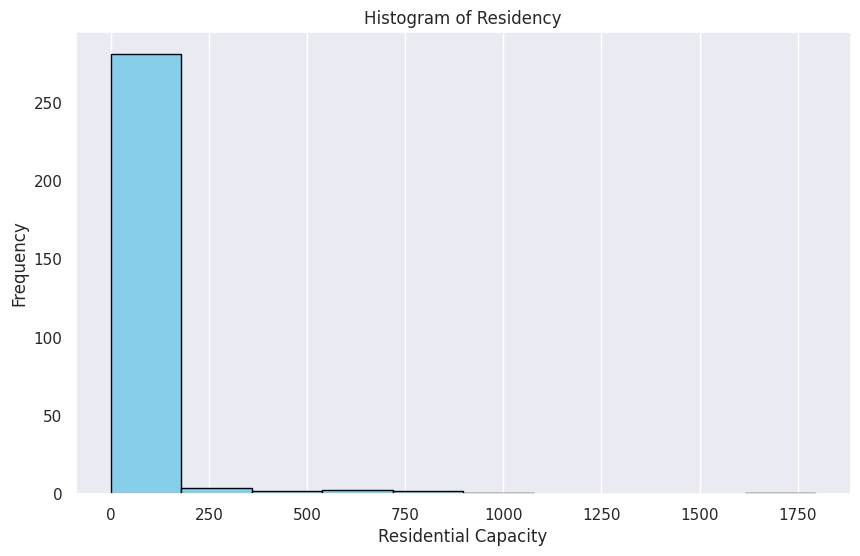

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['Residential Capacity'], bins=10, color='skyblue', edgecolor='black', range=(0, df['Residential Capacity'].max()))
plt.title('Histogram of Residency')
plt.xlabel('Residential Capacity')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

From the graph, we can see that most of the residential capacity lies between 0-250 people. The few buildings that have capacity of higher than 1500 stretches the horizontal axis, so we will draw another graph by looking at only the buildings between the residency of 1 and 250. (since building with capacity of 0 means that data is either not collected or the building has 0 capacity, which are insignificant datasets).

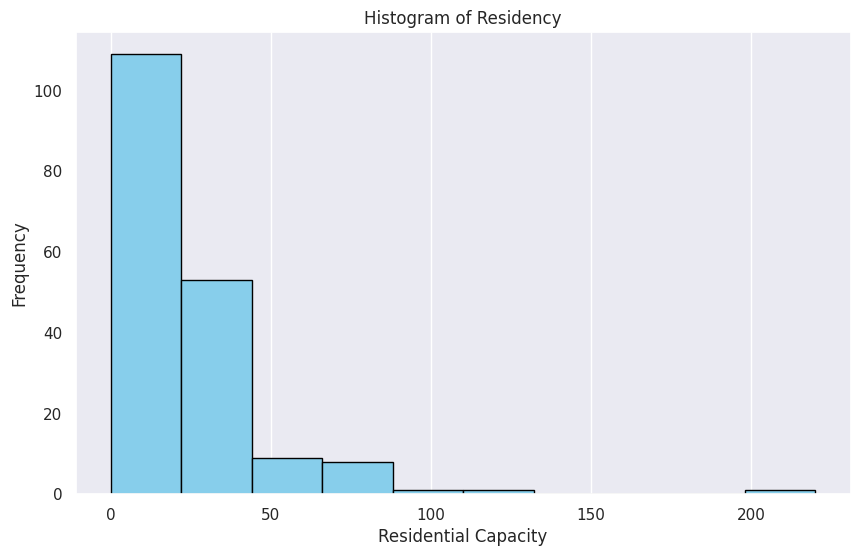

In [43]:
dfFilter = df[df['Residential Capacity'] <= 250]
dfFilter = dfFilter[dfFilter['Residential Capacity'] >= 1]
plt.figure(figsize=(10, 6))
plt.hist(dfFilter['Residential Capacity'], bins=10, color='skyblue', edgecolor='black', range=(0, dfFilter['Residential Capacity'].max()))
plt.title('Histogram of Residency')
plt.xlabel('Residential Capacity')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()


As mentioned above, we need to remove the datapoints that are 0 (since they are insignificant), which can be done by filtering the dataset.

In [44]:
filterByResidentialCapacity_df = df[df['Residential Capacity'] >= 1]
filterByResidentialCapacity_df.head()

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,nan nan
2,CRC,500,10 BUICK STREET,STUDENT VILLAGE 1,Residential,Housing,Apartment Style,1.0,1,1.0,817.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,3.0,nan nan
9,CRC,657,1019 COMMONWEALTH AVENUE,NaN,Residential,Housing,Large Dormitory-Style,1.0,1,1.0,274.0,nan nan


Now that we have found the importance of the variables and know how to filter the dataset to make it cleaner, we will apply the three filters and make a new dataset.

In [45]:
df = df[df['Mechanical Ventilation'] < 0.6]
df = df[df['Maintained by BU FMO'] == 1]
df = df[df['Residential Capacity'] >= 1.0]
df.head()

,Site Code,Building Code,Building Description,Building Name,Building Type,Residential Group,Residential Building Type,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity,Street 2 Combined Address
0,CRC,739,1 BUSWELL STREET,ENGINEERING HOUSE,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,nan nan
3,CRC,697,10 COTTAGE FARM ROAD,HOUSE,Residential,Other,House,3.0,1,0.5,5.0,nan nan
7,CRC,956,100 MOUNTFORT STREET,NaN,Residential,Housing,Apartment Style,1.0,1,0.0,3.0,nan nan
10,CRC,775,1053 BEACON STREET,NaN,Residential,Housing,Small Dormitory-Style,1.0,1,0.0,25.0,nan nan
11,CRC,555,11 BAY STATE ROAD,NaN,Residential,Rental,Apartment Style,3.0,1,0.0,8.0,nan nan


Now we will take a look at the cleaned dataset.

In [46]:
df.describe()

,Housing Type,Maintained by BU FMO,Mechanical Ventilation,Residential Capacity
count,181.000000,181.0,181.000000,181.000000
mean,1.439227,1.0,0.022099,38.480663
std,0.712318,0.0,0.103053,140.329992
min,1.000000,1.0,0.000000,3.000000
25%,1.000000,1.0,0.000000,12.000000
50%,1.000000,1.0,0.000000,18.000000
75%,2.000000,1.0,0.000000,25.000000
max,3.000000,1.0,0.500000,1795.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Code                  181 non-null    object 
 1   Building Code              181 non-null    object 
 2   Building Description       181 non-null    object 
 3   Building Name              31 non-null     object 
 4   Building Type              181 non-null    object 
 5   Residential Group          181 non-null    object 
 6   Residential Building Type  181 non-null    object 
 7   Housing Type               181 non-null    float64
 8   Maintained by BU FMO       181 non-null    int64  
 9   Mechanical Ventilation     181 non-null    float64
 10  Residential Capacity       181 non-null    float64
 11  Street 2 Combined Address  181 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 18.4+ KB


In [48]:
df.isnull().sum()

Site Code                      0
Building Code                  0
Building Description           0
Building Name                150
Building Type                  0
Residential Group              0
Residential Building Type      0
Housing Type                   0
Maintained by BU FMO           0
Mechanical Ventilation         0
Residential Capacity           0
Street 2 Combined Address      0
dtype: int64

From the information above, most of the datasets have 0 null data points and now we are prepared to use this dataset for further use.

### Second Dataset: High Volume Event Spaces

##### This dataset contains information regarding the different buildings at Boston University that are used for high volume events, locations that require water bottle stations.

In [ ]:
df = pd.read_csv('High Volume Event Spaces.csv')
df.head()

,Room_Name,Address,Floor,Current,Installed_Time,Notes,Candidacy
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,0.0,NaN,"casual catered events, high liklihood of using...",Maybe
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,0.0,NaN,"casual catered events, high liklihood of using...",Maybe
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,-1.0,NaN,use of the space is limited; there are fillers...,More_research_needed
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,NaN,complete FY23,There are a bunch already down the hallways; 4...,Enough
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,1.0,NaN,hallway by room 105,More_research_needed


##### First, we will take a look at the columns/variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Room_Name       28 non-null     object 
 1   Address         28 non-null     object 
 2   Floor           26 non-null     object 
 3   Current         9 non-null      float64
 4   Installed_Time  5 non-null      object 
 5   Notes           22 non-null     object 
 6   Candidacy       28 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.7+ KB


Initial Questions To Consider:

This dataset contains 7 columns (variables).

This dataset has 28 rows (observations), indicating there are 28 buildings.

All of them are categorical variables.

Categorical Variables: Floor, Candidacy.

Numerical Variables: None

### Data Completion

Information on how much data is provided

In [ ]:
df.isnull().sum()

Room_Name          0
Address            0
Floor              2
Current           19
Installed_Time    23
Notes              6
Candidacy          0
dtype: int64

Some of the data is missing from the dataset.

Columns with missing data points: Floor, Current, Installed_Time, Notes

However, all of them except the floor and Notes information are insignificant. The Current column shows whether the locations have water bottle filling stations, which are also shown on the Candidacy column and Installed_Time does not matter since we do not care about when the water bottle stations at the specific location was made. In addition, the Installed_Time for all of the data point is 2023, which is last year (indicating that it does not require a new one) or Nan.

### Data Cleaning

We can delete the Current and Installed_Time since they contain irrelevant information.

In [ ]:
df.drop(['Current', 'Installed_Time'],axis=1, inplace=True)
df.head()

,Room_Name,Address,Floor,Notes,Candidacy
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,"casual catered events, high liklihood of using...",Maybe
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,"casual catered events, high liklihood of using...",Maybe
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,use of the space is limited; there are fillers...,More_research_needed
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,There are a bunch already down the hallways; 4...,Enough
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,hallway by room 105,More_research_needed


We can map some of the categorical variables into integers for easier view.

### Candidacy
1. Good = 1
2. Maybe = 2
3. Bad = 3
4. Enough = 4
5. More_research_needed = 5

In [ ]:
mapping = {'Good': 1, 'Maybe': 2, 'Bad': 3, 'Enough': 4, 'More_research_needed': 5}

df['Candidacy'] = df['Candidacy'].map(mapping)
df.head()

,Room_Name,Address,Floor,Notes,Candidacy
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,"casual catered events, high liklihood of using...",2
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,"casual catered events, high liklihood of using...",2
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,use of the space is limited; there are fillers...,5
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,There are a bunch already down the hallways; 4...,4
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,hallway by room 105,5


### Floor

Remove the strings on the floor.

For example, 2nd Floor --> 2.

In [ ]:
df['Floor Number'] = df['Floor'].str.extract('(\d+)').fillna(0).astype(int)
df

,Room_Name,Address,Floor,Notes,Candidacy,Floor Number
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,"casual catered events, high liklihood of using...",2,2
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,"casual catered events, high liklihood of using...",2,1
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,use of the space is limited; there are fillers...,5,3
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,There are a bunch already down the hallways; 4...,4,0
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,hallway by room 105,5,1
5,College of General Studies Gilbane Lounge,871 Commonwealth Avenue,1st Floor,one on each floor,4,1
6,College of General Studies Katzenberg Lounge,871 Commonwealth Avenue,4th Floor,NaN,4,4
7,College of General Studies Sleeper Auditorium,871 Commonwealth Avenue,1st Floor,NaN,4,1
8,Dahod Family Alumni Center,225 Bay State Road,1st Floor,There's one in the space btw Castle and Admiss...,4,1
9,George Sherman Union Alley,775 Commonwealth Avenue,Basement,The space is used heavily for dance/performanc...,4,0


The 15th row that contains 'Howard Thurman Center' says "1st and 2nd Floors". So, we will change it to '1, 2' manually.

In [ ]:
df.iloc[14, 5] = '1, 2'
df

,Room_Name,Address,Floor,Notes,Candidacy,Floor Number
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,"casual catered events, high liklihood of using...",2,2
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,"casual catered events, high liklihood of using...",2,1
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,use of the space is limited; there are fillers...,5,3
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,There are a bunch already down the hallways; 4...,4,0
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,hallway by room 105,5,1
5,College of General Studies Gilbane Lounge,871 Commonwealth Avenue,1st Floor,one on each floor,4,1
6,College of General Studies Katzenberg Lounge,871 Commonwealth Avenue,4th Floor,NaN,4,4
7,College of General Studies Sleeper Auditorium,871 Commonwealth Avenue,1st Floor,NaN,4,1
8,Dahod Family Alumni Center,225 Bay State Road,1st Floor,There's one in the space btw Castle and Admiss...,4,1
9,George Sherman Union Alley,775 Commonwealth Avenue,Basement,The space is used heavily for dance/performanc...,4,0


Now that we have the floor number, we can delete the original Floor column with strings.

In [ ]:
df.drop(['Floor'],axis=1, inplace=True)
df.head()

,Room_Name,Address,Notes,Candidacy,Floor Number
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,"casual catered events, high liklihood of using...",2,2
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,"casual catered events, high liklihood of using...",2,1
2,Case Center Eilberg Lounge,285 Babcock Street,use of the space is limited; there are fillers...,5,3
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,There are a bunch already down the hallways; 4...,4,0
4,College of Communication Lounge,640 Commowealth Avenue,hallway by room 105,5,1


## Now that we finished the mapping and cleaning of the dataset, we can now find the columns (variables) that we believe would help complete our main objective.

They are

1. Notes - Contains information regarding the rooms.

2. Candidacy - Contains information on whether we already have water bottle filling stations, whether the place is a good or bad place to install a water bottle filling station.

Even though the Notes column contains information regarding the buildings and the rooms, they are in human language (strings) that are difficult to categorize into numbers. However, since we only have 29 rows, we will manually read them as we go further into the project. We will skip this column for now.

Therefore, we will look at the candidacy dataset.

In [ ]:
df['Candidacy'].value_counts()

5    8
4    8
2    5
1    5
3    2
Name: Candidacy, dtype: int64

There are 8 locations that need more research, 8 locations that already have water bottle filling stations, 5 locations that are considered (maybe) to install water bottle stations, 5 locations that are good candidates, and 2 locations that are bad candidates.

We will now plot a histogram.

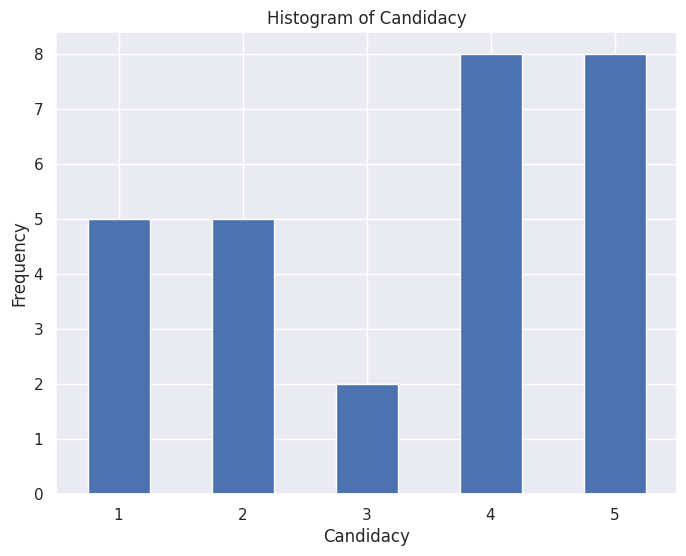

In [ ]:
count = df['Candidacy'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
count.plot(kind='bar')
plt.title('Histogram of Candidacy')
plt.xlabel('Candidacy')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Since Candidacy is a categorical value, using the .describe() function is not required and would only cause confusion.

We can also filter the columns. Since we need to prioritize buildings that are good place to install water bottle filling stations, we will only get the rows that have candidacy of 1, 2 and 5 since 3 indicates a bad place and 4 indicates that a station already exists (installing another one would not be efficient).

In [ ]:
df = df[df['Candidacy'].isin([1, 2, 5])]
df.head()

,Room_Name,Address,Notes,Candidacy,Floor Number
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,"casual catered events, high liklihood of using...",2,2
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,"casual catered events, high liklihood of using...",2,1
2,Case Center Eilberg Lounge,285 Babcock Street,use of the space is limited; there are fillers...,5,3
4,College of Communication Lounge,640 Commowealth Avenue,hallway by room 105,5,1
10,George Sherman Union Conference Rooms,775 Commonwealth Avenue,used a lot for BU meetings... add to hallways ...,1,3


Now we will take a look at the cleaned dataset.

In [ ]:
df.describe()

,Candidacy
count,18.000000
mean,3.055556
std,1.830211
min,1.000000
25%,1.250000
50%,2.000000
75%,5.000000
max,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 26
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Room_Name     18 non-null     object
 1   Address       18 non-null     object
 2   Notes         15 non-null     object
 3   Candidacy     18 non-null     int64 
 4   Floor Number  18 non-null     object
dtypes: int64(1), object(4)
memory usage: 864.0+ bytes


In [ ]:
df.isnull().sum()

Room_Name       0
Address         0
Notes           3
Candidacy       0
Floor Number    0
dtype: int64

From the information above, most of the datasets have 0 null data points and now we are prepared to use this dataset for further use.

### Third Dataset: Geospatial

##### This dataset contains information regarding the locations of the current water bottle filling stations. One thing to note is that this dataset may not be representative of all water filling stations on campus. According to the document, they believe that this is about 80% accurate and complete.

##### This dataset is transformed into a csv manually by looking at the map from https://maps.bu.edu/?id=647#!bm/?ct/0?m/620045?s/

In [ ]:
df = pd.read_csv("geospatial.csv")
df.head(5)

,BUILDING,FLOOR,TOTAL STATIONS/BUILDING
0,1019 Commonwealth,1,1
1,110-112 Cummington,2,1
2,111 Cummington,1,4
3,111 Cummington,1,4
4,111 Cummington,0,4


##### First, we will take a look at the columns/variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BUILDING                 200 non-null    object
 1   FLOOR                    200 non-null    object
 2   TOTAL STATIONS/BUILDING  200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


Initial Questions To Consider:

This dataset contains 3 columns (variables).

This dataset has 200 rows (observations), indicating there are 200 buildings.

There are only categorical variables.

Categorical Variables: Floor, Stations/Buildings

Numerical Variables: None

### Data Completion

Information on how much data is provided

In [ ]:
df.isnull().sum()

BUILDING                   0
FLOOR                      0
TOTAL STATIONS/BUILDING    0
dtype: int64

Since we manually wrote this csv file from the map provided, none of the data is null and all of them are complete.

### Data Cleaning

Since this file only indicate locations that already have water bottle filling stations, there does not need to do any cleaning or filtering. We will simply use this dataset for checking redundancy since installing a water bottle station nearby these locations would be inefficient.

### Fourth Dataset: Bottle Fillers Inventory

##### This dataset contains information regarding the locations of the current water bottle filling stations.

In [ ]:
df = pd.read_csv("Bottle Fillers Inventory.csv")
df.head(5)

,Address A,Address B,Floor,Description,Accessibility,Handicap Accessible,Space@Bu room,Quantity,Date Installed,Type,Walk-Thru Notes,Completed
0,100,Ashford St,First,"Hallway across from vending machines, across f...",Public,Yes,191,1.0,NaN,Combo Bottle Filler/Drinking Fountain,two additional drinking fountain locations in ...,1/5/2024
1,120,Ashford St,First,"Kitchenette, Room 116A",Restricted,Yes,116A,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024
2,120,Ashford St,Second,"Kitchenette, Room 222",Restricted,Yes,222,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024
3,8,St. Mary's Street,Basement,Hallway by bathrooms,NaN,NaN,B81,1.0,Dec-23,Combo Bottle Filler/Drinking Fountain,NaN,NaN
4,8,St. Mary's Street,First,Hallway by electrical room,NaN,NaN,181,1.0,NaN,NaN,NaN,NaN


##### First, we will take a look at the columns/variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address A            207 non-null    object 
 1   Address B            207 non-null    object 
 2   Floor                207 non-null    object 
 3   Description          185 non-null    object 
 4   Accessibility        3 non-null      object 
 5   Handicap Accessible  3 non-null      object 
 6   Space@Bu room        188 non-null    object 
 7   Quantity             209 non-null    float64
 8   Date Installed       26 non-null     object 
 9   Type                 18 non-null     object 
 10  Walk-Thru Notes      29 non-null     object 
 11  Completed            3 non-null      object 
dtypes: float64(1), object(11)
memory usage: 20.0+ KB


Initial Questions To Consider:

This dataset contains 12 columns (variables).

This dataset has 212 rows (observations), indicating there are 212 locations/buildings.

There are categorical and numerical variables.

Categorical Variables: Floor, Accessibility, Handicap Accessible

Numerical Variables: Quantity

### Data Completion

Information on how much data is provided

In [ ]:
df.isnull().sum()

Address A                5
Address B                5
Floor                    5
Description             27
Accessibility          209
Handicap Accessible    209
Space@Bu room           24
Quantity                 3
Date Installed         186
Type                   194
Walk-Thru Notes        183
Completed              209
dtype: int64

All of the columns contain some missing data points.

However, even if some of the data point is missing, we will try our best to extract meaningful results from it. Also, data is constantly getting updated according to the Sustainability team, so we can expect more information in the future.

### Data Cleaning

We can combine the Address A and Address B into one address.

In [ ]:
df['Address'] = df['Address A'].astype(str) + ' ' + df['Address B'].astype(str)
df.head()

,Address A,Address B,Floor,Description,Accessibility,Handicap Accessible,Space@Bu room,Quantity,Date Installed,Type,Walk-Thru Notes,Completed,Address
0,100,Ashford St,First,"Hallway across from vending machines, across f...",Public,Yes,191,1.0,NaN,Combo Bottle Filler/Drinking Fountain,two additional drinking fountain locations in ...,1/5/2024,100 Ashford St
1,120,Ashford St,First,"Kitchenette, Room 116A",Restricted,Yes,116A,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024,120 Ashford St
2,120,Ashford St,Second,"Kitchenette, Room 222",Restricted,Yes,222,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024,120 Ashford St
3,8,St. Mary's Street,Basement,Hallway by bathrooms,NaN,NaN,B81,1.0,Dec-23,Combo Bottle Filler/Drinking Fountain,NaN,NaN,8 St. Mary's Street
4,8,St. Mary's Street,First,Hallway by electrical room,NaN,NaN,181,1.0,NaN,NaN,NaN,NaN,8 St. Mary's Street


Now, we can delete Address A and Address B columns and reorder it.

In [ ]:
df.drop(['Address A', 'Address B'], axis=1, inplace=True)
df.head()

,Floor,Description,Accessibility,Handicap Accessible,Space@Bu room,Quantity,Date Installed,Type,Walk-Thru Notes,Completed,Address
0,First,"Hallway across from vending machines, across f...",Public,Yes,191,1.0,NaN,Combo Bottle Filler/Drinking Fountain,two additional drinking fountain locations in ...,1/5/2024,100 Ashford St
1,First,"Kitchenette, Room 116A",Restricted,Yes,116A,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024,120 Ashford St
2,Second,"Kitchenette, Room 222",Restricted,Yes,222,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024,120 Ashford St
3,Basement,Hallway by bathrooms,NaN,NaN,B81,1.0,Dec-23,Combo Bottle Filler/Drinking Fountain,NaN,NaN,8 St. Mary's Street
4,First,Hallway by electrical room,NaN,NaN,181,1.0,NaN,NaN,NaN,NaN,8 St. Mary's Street


In [ ]:
cols = ['Address'] + [col for col in df.columns if col != 'Address']
df = df[cols]

In [ ]:
df.head()

,Address,Floor,Description,Accessibility,Handicap Accessible,Space@Bu room,Quantity,Date Installed,Type,Walk-Thru Notes,Completed
0,100 Ashford St,First,"Hallway across from vending machines, across f...",Public,Yes,191,1.0,NaN,Combo Bottle Filler/Drinking Fountain,two additional drinking fountain locations in ...,1/5/2024
1,120 Ashford St,First,"Kitchenette, Room 116A",Restricted,Yes,116A,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024
2,120 Ashford St,Second,"Kitchenette, Room 222",Restricted,Yes,222,1.0,NaN,Office-Style Water Cooler,NaN,1/5/2024
3,8 St. Mary's Street,Basement,Hallway by bathrooms,NaN,NaN,B81,1.0,Dec-23,Combo Bottle Filler/Drinking Fountain,NaN,NaN
4,8 St. Mary's Street,First,Hallway by electrical room,NaN,NaN,181,1.0,NaN,NaN,NaN,NaN


Completed column is unimportant since most of the data points are missing and the completion date of installation of existing water bottle stations are not important. We can drop this column as well.

Date installed is also insignificant for the same reason.

The type of the water bottle filling station is also unimportant since we only care about the existence.

Majority of the two accessibility columns (Handicap Accessible, Accessibility) contain the value of NaN, which means that data does not exist in those columns. There are 212 observations but 209 of these columns do not exist, meaning that 98.58% of the data is missing. Therefore, it is better to omit these columns due to the missing data.



In [ ]:
df.drop(['Date Installed', 'Type', 'Completed', 'Accessibility', 'Handicap Accessible'], axis=1, inplace=True)
df.head()

,Address,Floor,Description,Space@Bu room,Quantity,Walk-Thru Notes
0,100 Ashford St,First,"Hallway across from vending machines, across f...",191,1.0,two additional drinking fountain locations in ...
1,120 Ashford St,First,"Kitchenette, Room 116A",116A,1.0,NaN
2,120 Ashford St,Second,"Kitchenette, Room 222",222,1.0,NaN
3,8 St. Mary's Street,Basement,Hallway by bathrooms,B81,1.0,NaN
4,8 St. Mary's Street,First,Hallway by electrical room,181,1.0,NaN


## Now that we finished the mapping and cleaning of the dataset, we can now find the columns (variables) that we believe would help complete our main objective.

They are

1. Quantity - The number of water bottle filling stations per location.

In [ ]:
df['Quantity'].value_counts()

1.0      189
2.0       15
3.0        2
30.0       1
254.0      1
255.0      1
Name: Quantity, dtype: int64

There are 189 buildings that have 1 water bottle filling station, 15 buildings that have 2 water bottle filling stations, and 2 buildings that have 3 water bottle filling stations, and 1 location that have 30, 254, and 255 water bottle filling stations. These are a combination of locations. For example, there are 30 water bottle stations in 700 commonwealth avenue from floor 5 to 18.

In [ ]:
df[['Quantity']].describe()

,Quantity
count,209.000000
mean,3.655502
std,24.798728
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,255.000000


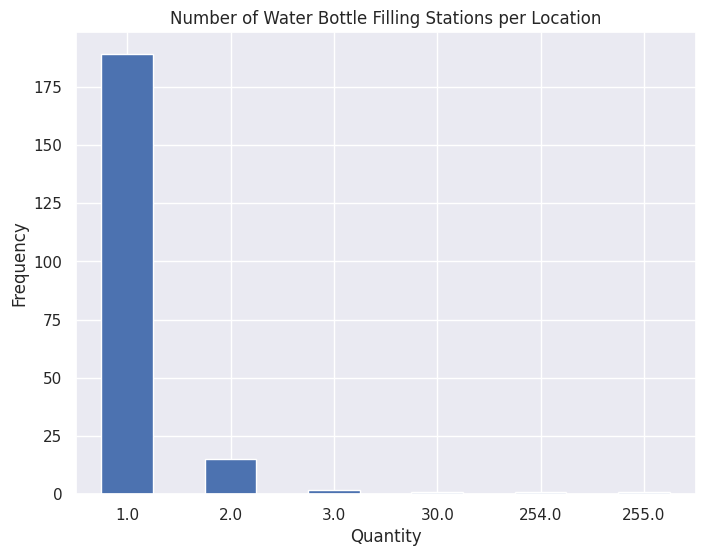

In [ ]:
count = df['Quantity'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar')
plt.title('Number of Water Bottle Filling Stations per Location')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

We do not need to filter any columns for this data since they are locations that already have water bottle filling stations.

With the full data, we will look at the cleaned dataset.

In [ ]:
df.describe()

,Quantity
count,209.000000
mean,3.655502
std,24.798728
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,255.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          212 non-null    object 
 1   Floor            207 non-null    object 
 2   Description      185 non-null    object 
 3   Space@Bu room    188 non-null    object 
 4   Quantity         209 non-null    float64
 5   Walk-Thru Notes  29 non-null     object 
dtypes: float64(1), object(5)
memory usage: 10.1+ KB


In [ ]:
df.isnull().sum()

Address              0
Floor                5
Description         27
Space@Bu room       24
Quantity             3
Walk-Thru Notes    183
dtype: int64

### Fifth Dataset: Historical Density

##### This dataset contains information regarding the density and population of various buildings at Boston University at specific time from 2020 to 2023.

In [ ]:
df = pd.read_csv("historical_density.csv")
df.head(5)

<ipython-input-70-2f4e6a8c7112>:1: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("historical_density.csv")


,Building Address,Building Type,building_code,Building_Floor,building_name,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
0,NaN,NaN,514A,514A_1,NaN,0.0,"Sunday, August 23, 2020",1,5:00:00 PM,0.00%,NaN,2.0,NaN
1,NaN,NaN,514A,514A_1,NaN,0.0,"Sunday, August 23, 2020",1,6:00:00 PM,0.00%,NaN,2.0,NaN
2,NaN,NaN,514A,514A_1,NaN,0.0,"Tuesday, August 25, 2020",1,5:00:00 PM,0.00%,NaN,4.0,NaN
3,NaN,NaN,514A,514A_1,NaN,0.0,"Wednesday, August 26, 2020",1,11:00:00 AM,0.00%,NaN,4.0,NaN
4,NaN,NaN,514A,514A_1,NaN,0.0,"Wednesday, August 26, 2020",1,12:00:00 PM,0.00%,NaN,2.0,NaN


##### First, we will take a look at the columns/variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150003 entries, 0 to 150002
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Building Address                       94164 non-null   object 
 1   Building Type                          94161 non-null   object 
 2   building_code                          149999 non-null  object 
 3   Building_Floor                         149999 non-null  object 
 4   building_name                          94161 non-null   object 
 5   Capacity                               150000 non-null  float64
 6   date                                   149999 non-null  object 
 7   Floor                                  149999 non-null  object 
 8   Hour 2                                 149999 non-null  object 
 9   Percentage                             150000 non-null  object 
 10  Percentage of Capacity Used            86226 non-null   

Initial Questions To Consider:

This dataset contains 13 columns (variables).

This dataset has 150003 rows (observations), indicating there are 150003 time periods for various buildings at Boston University.

There are both categorical and numerical variables. At quick glance there seems to be more numerical variables than categorical variables.

Categorical Variables: Hours 2, date, Floor

Numerical Variables: Capacity, Percentage, Percentage, Percentage of Capacity Used, Population, and Population % difference from Capacity

### Data Completion

Information on how much data is provided

In [ ]:
df.isnull().sum()

Building Address                         55839
Building Type                            55842
building_code                                4
Building_Floor                               4
building_name                            55842
Capacity                                     3
date                                         4
Floor                                        4
Hour 2                                       4
Percentage                                   3
Percentage of Capacity Used              63777
Population                                   3
Population % difference from Capacity    63777
dtype: int64

All of the columns contain some missing data points.

However, even if some of the data point is missing, we will try our best to extract meaningful results from it. Also, data is constantly getting updated according to the Sustainability team, so we can expect more information in the future.

### Data Cleaning

We will remove the datapoints that do not have specific building address since those datapoints will be inefficient.

In [ ]:
df = df.dropna(subset=['Building Address'])
df.head()

,Building Address,Building Type,building_code,Building_Floor,building_name,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,Parking,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,3:00:00 PM,200.00%,133%,8.0,33.33%
55839,610 ALBANY STREET - GARAGE,Parking,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,4:00:00 PM,200.00%,133%,8.0,33.33%
55840,610 ALBANY STREET - GARAGE,Parking,913,913_1,610 GARAGE,12.0,"Sunday, August 23, 2020",1,5:00:00 PM,400.00%,133%,16.0,33.33%
55841,610 ALBANY STREET - GARAGE,Parking,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,6:00:00 PM,400.00%,200%,12.0,100.00%
55842,610 ALBANY STREET - GARAGE,Parking,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,7:00:00 PM,400.00%,200%,12.0,100.00%


### Data Mapping

We will change the building types into numerical values.

In [ ]:
UniqueType = df['Building Type'].unique()
print(UniqueType)

['Parking' 'Academic' 'Athletic' nan]


Buildings

1. Parking will be changed to 1.
2. Academic will be changed to 2.
3. Athletic will be changed to 3.
4. Nan will be changed to 0.

In [ ]:
mapping = {'Parking': 1, 'Academic': 2, 'Athletic': 3, 'NaN': 0}
df['Building Type'] = df['Building Type'].map(mapping)
df.head()

,Building Address,Building Type,building_code,Building_Floor,building_name,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,1.0,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,3:00:00 PM,200.00%,133%,8.0,33.33%
55839,610 ALBANY STREET - GARAGE,1.0,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,4:00:00 PM,200.00%,133%,8.0,33.33%
55840,610 ALBANY STREET - GARAGE,1.0,913,913_1,610 GARAGE,12.0,"Sunday, August 23, 2020",1,5:00:00 PM,400.00%,133%,16.0,33.33%
55841,610 ALBANY STREET - GARAGE,1.0,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,6:00:00 PM,400.00%,200%,12.0,100.00%
55842,610 ALBANY STREET - GARAGE,1.0,913,913_1,610 GARAGE,6.0,"Sunday, August 23, 2020",1,7:00:00 PM,400.00%,200%,12.0,100.00%


The building_floor column contains redundant information since the format is "building_code"_"floor". So, delete this column.

In [ ]:
df.drop(['Building_Floor'],axis=1, inplace=True)
df.head()

,Building Address,Building Type,building_code,building_name,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,1.0,913,610 GARAGE,6.0,"Sunday, August 23, 2020",1,3:00:00 PM,200.00%,133%,8.0,33.33%
55839,610 ALBANY STREET - GARAGE,1.0,913,610 GARAGE,6.0,"Sunday, August 23, 2020",1,4:00:00 PM,200.00%,133%,8.0,33.33%
55840,610 ALBANY STREET - GARAGE,1.0,913,610 GARAGE,12.0,"Sunday, August 23, 2020",1,5:00:00 PM,400.00%,133%,16.0,33.33%
55841,610 ALBANY STREET - GARAGE,1.0,913,610 GARAGE,6.0,"Sunday, August 23, 2020",1,6:00:00 PM,400.00%,200%,12.0,100.00%
55842,610 ALBANY STREET - GARAGE,1.0,913,610 GARAGE,6.0,"Sunday, August 23, 2020",1,7:00:00 PM,400.00%,200%,12.0,100.00%


The buillding address contains the building name, so the building_name is redundant. Therefore, we will also delete this data.

In [ ]:
df.drop(['building_name'],axis=1, inplace=True)
df.head()

,Building Address,Building Type,building_code,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,1.0,913,6.0,"Sunday, August 23, 2020",1,3:00:00 PM,200.00%,133%,8.0,33.33%
55839,610 ALBANY STREET - GARAGE,1.0,913,6.0,"Sunday, August 23, 2020",1,4:00:00 PM,200.00%,133%,8.0,33.33%
55840,610 ALBANY STREET - GARAGE,1.0,913,12.0,"Sunday, August 23, 2020",1,5:00:00 PM,400.00%,133%,16.0,33.33%
55841,610 ALBANY STREET - GARAGE,1.0,913,6.0,"Sunday, August 23, 2020",1,6:00:00 PM,400.00%,200%,12.0,100.00%
55842,610 ALBANY STREET - GARAGE,1.0,913,6.0,"Sunday, August 23, 2020",1,7:00:00 PM,400.00%,200%,12.0,100.00%


The date is significant by its time in the week since it might be useful to categorize the date as weekdays or weekends. The date is considered less significant. Therefore, we will delete insignificant information.

In [ ]:
df['date'] = df['date'].str.extract(r'(^[\w]+)')

In [ ]:
df.head()

,Building Address,Building Type,building_code,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,3:00:00 PM,200.00%,133%,8.0,33.33%
55839,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,4:00:00 PM,200.00%,133%,8.0,33.33%
55840,610 ALBANY STREET - GARAGE,1.0,913,12.0,Sunday,1,5:00:00 PM,400.00%,133%,16.0,33.33%
55841,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,6:00:00 PM,400.00%,200%,12.0,100.00%
55842,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,7:00:00 PM,400.00%,200%,12.0,100.00%


The last three rows contain overal information. Therefore, we do not need those data points.

In [ ]:
df = df.iloc[:-3, :]
df.tail()

,Building Address,Building Type,building_code,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
149994,925 COMMONWEALTH AVENUE,3.0,503.0,0.0,Wednesday,b,7:00:00 AM,0.00%,NaN,6.0,NaN
149995,925 COMMONWEALTH AVENUE,3.0,503.0,0.0,Wednesday,b,8:00:00 AM,0.00%,NaN,8.0,NaN
149996,925 COMMONWEALTH AVENUE,3.0,503.0,0.0,Wednesday,b,9:00:00 AM,0.00%,NaN,10.0,NaN
149997,925 COMMONWEALTH AVENUE,3.0,503.0,0.0,Wednesday,b,10:00:00 AM,0.00%,NaN,8.0,NaN
149998,925 COMMONWEALTH AVENUE,3.0,503.0,0.0,Wednesday,b,11:00:00 AM,0.00%,NaN,4.0,NaN


We can now check how many buildings this dataset contains.

In [ ]:
print(df['Building Address'].unique())

['610 ALBANY STREET - GARAGE' '710 ALBANY STREET - GARAGE'
 '80 EAST CONCORD STREET - A-BLDG' '925 COMMONWEALTH AVENUE']


There are four buildings and now we can check how many data points we have per building.

In [ ]:
df['Building Address'].value_counts()

80 EAST CONCORD STREET - A-BLDG    54524
610 ALBANY STREET - GARAGE         15278
925 COMMONWEALTH AVENUE            13105
710 ALBANY STREET - GARAGE         11254
Name: Building Address, dtype: int64

From this information, we discovered that majority of the dataset is from the location 80 EAST CONCORD STREET.

We can also plot a histogram on the dataset.

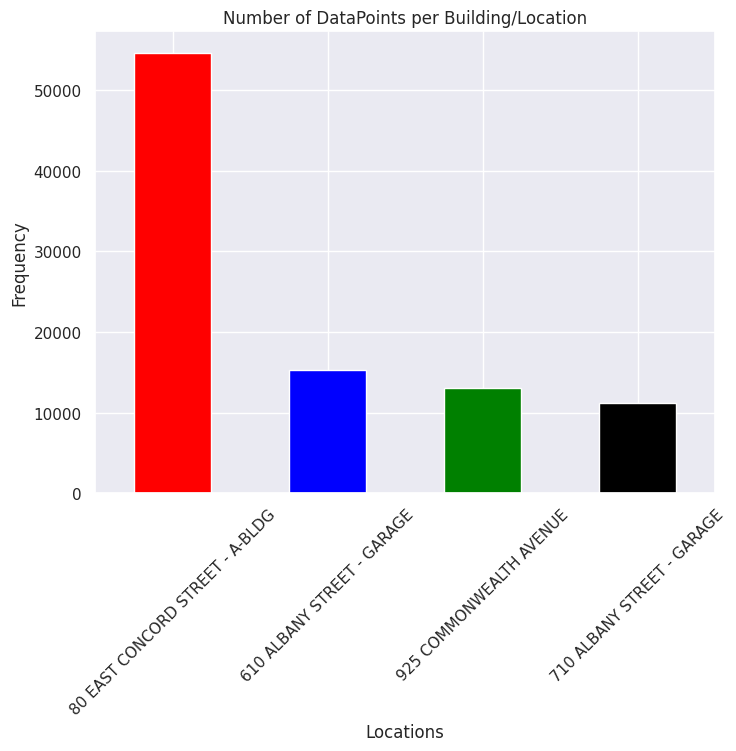

In [ ]:
count = df['Building Address'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=['red', 'blue', 'green', 'black'])
plt.title('Number of DataPoints per Building/Location')
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Now that we have the data cleaned, we will look at the information of the dataset.

In [ ]:
df.describe()

,Building Type,Capacity,Population
count,94161.000000,94161.000000,94161.000000
mean,1.857404,54.628594,36.198373
std,0.632945,31.285075,65.809494
min,1.000000,0.000000,1.000000
25%,1.000000,34.000000,4.000000
50%,2.000000,52.000000,12.000000
75%,2.000000,71.000000,40.000000
max,3.000000,354.000000,1857.000000


In [ ]:
df.isnull().sum()

Building Address                            0
Building Type                               0
building_code                               0
Capacity                                    0
date                                        0
Floor                                       0
Hour 2                                      0
Percentage                                  0
Percentage of Capacity Used              7936
Population                                  0
Population % difference from Capacity    7936
dtype: int64

Now, we can see that most of the data points are not null. The two percentages do not contain much information as the capacity and population are the most significant data points per location.

Since the data reports the building address, we will divide the group based on the Building Address. Just because there is more data from one location does not mean that it is the most popular building, so we will conduct groupby and average of the numerical variables.

We will first look at the number of data points per building address and hour.

In [ ]:
df_groupByBuilding = df.groupby(['Building Address', 'Hour 2']).size().reset_index(name='count')

In [ ]:
df_groupByBuilding

,Building Address,Hour 2,count
0,610 ALBANY STREET - GARAGE,10:00:00 AM,660
1,610 ALBANY STREET - GARAGE,10:00:00 PM,960
2,610 ALBANY STREET - GARAGE,11:00:00 AM,671
3,610 ALBANY STREET - GARAGE,11:00:00 PM,956
4,610 ALBANY STREET - GARAGE,12:00:00 AM,9
...,...,...,...
91,925 COMMONWEALTH AVENUE,7:00:00 PM,934
92,925 COMMONWEALTH AVENUE,8:00:00 AM,275
93,925 COMMONWEALTH AVENUE,8:00:00 PM,923
94,925 COMMONWEALTH AVENUE,9:00:00 AM,389


Now that we have it grouped by the building address and hour, we will view the average of the capacity and population based on the hour and building address.

In [ ]:
df_groupByBuildingAndAverageThem = df.groupby(['Building Address', 'Hour 2']).mean()

df_groupByBuildingAndAverageThem

<ipython-input-88-812f2dee4ceb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupByBuildingAndAverageThem = df.groupby(['Building Address', 'Hour 2']).mean()


Building Type    Capacity  Population
Building Address           Hour 2                                            
610 ALBANY STREET - GARAGE 10:00:00 AM            1.0  104.963636   26.875758
                           10:00:00 PM            1.0  104.062500   62.868750
                           11:00:00 AM            1.0  104.535022   26.839046
                           11:00:00 PM            1.0  104.071130   63.366109
                           12:00:00 AM            1.0  102.000000    1.000000
...                                               ...         ...         ...
925 COMMONWEALTH AVENUE    7:00:00 PM             3.0   11.079229   30.398287
                           8:00:00 AM             3.0    9.167273    4.381818
                           8:00:00 PM             3.0   11.347779   43.957746
                           9:00:00 AM             3.0    9.388175    8.311054
                           9:00:00 PM             3.0   11.123904   44.038377

[96 rows x 3 columns]

We will now plot a bar graph on the capacity based on the building and hour.




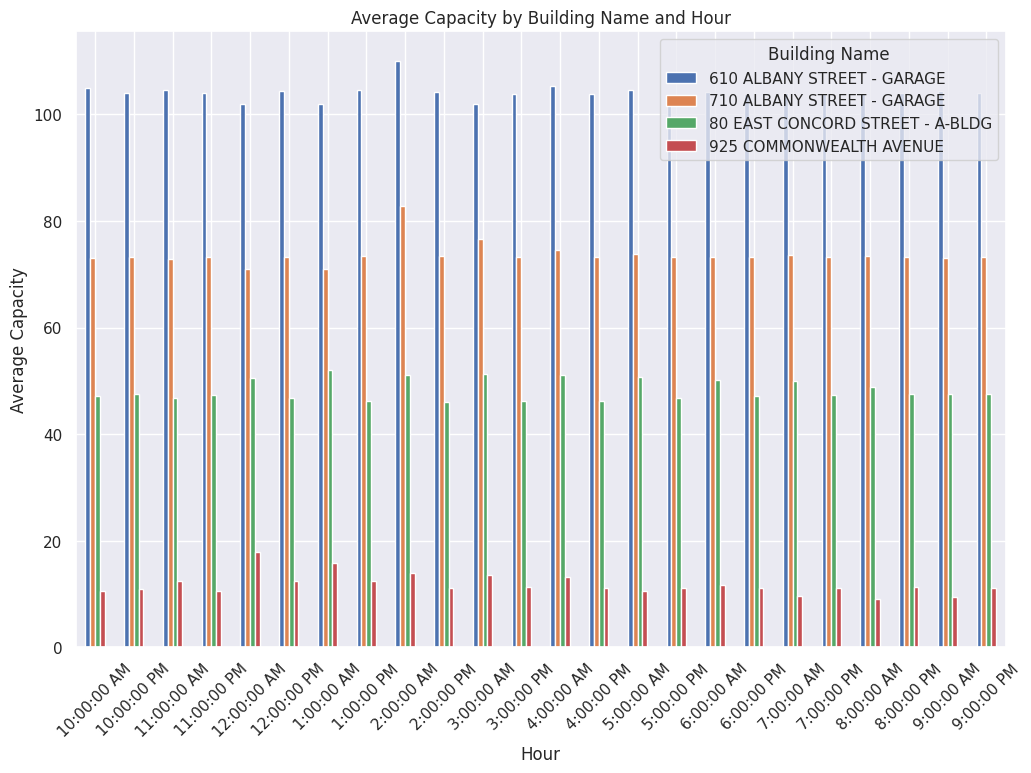

In [ ]:
group = df.groupby(['Building Address', 'Hour 2'])['Capacity'].mean().reset_index()

pivot_df = group.pivot(index='Hour 2', columns='Building Address', values='Capacity')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Capacity by Building Name and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Capacity')
plt.xticks(rotation=45)
plt.legend(title='Building Name')
plt.show()

The capacity, in average, marked generally the highest for the building 610 Albany Street - Garage. Ordering the average capacity from highest to lowest, in every time of the day, is generally 610 Albany Street - Garage, 710 Albany Street - Garage, 80 East Concord Street - A-BLDG, and 925 Commonwealth Avenue.

The same thing with population.

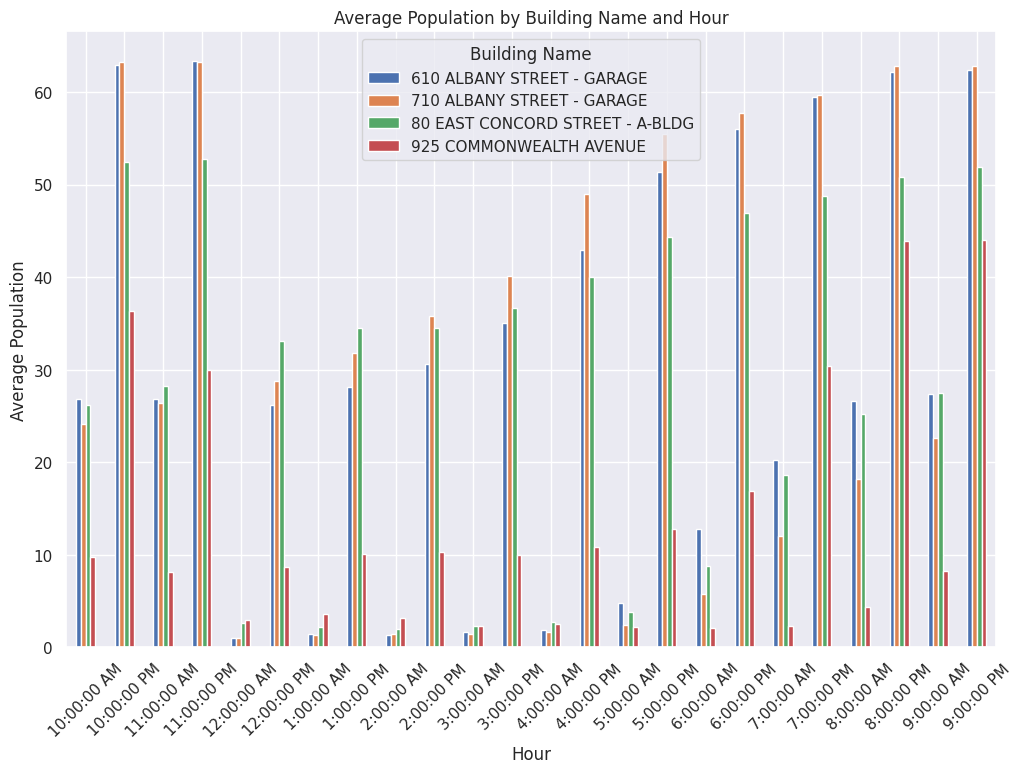

In [ ]:
group = df.groupby(['Building Address', 'Hour 2'])['Population'].mean().reset_index()

pivot_df = group.pivot(index='Hour 2', columns='Building Address', values='Population')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Population by Building Name and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Population')
plt.xticks(rotation=45)
plt.legend(title='Building Name')
plt.show()

The population, in average, marked generally the highest for the building 720 Albany Street - Garage. Unlike capacity, the highest average population did not have one building that marked the highest. Rather, three buildings, 610 Albany Street - Garage, 710 Albany Street - Garage, and 80 East Concord Street - A-BLDG marked the highest average population in different times. 925 Commonwealth Avenue marked the lowest for every time period.

Now, we want to find the percentages. Since percentages are denoted as string, we want to delete the % sign and make it into an integer.

In [ ]:
df['Percentage'] = df['Percentage'].str.rstrip('%').astype(float)
df['Percentage of Capacity Used'] = df['Percentage of Capacity Used'].str.rstrip('%').astype(float)
df['Population % difference from Capacity'] = df['Population % difference from Capacity'].str.rstrip('%').astype(float)
df.head()

,Building Address,Building Type,building_code,Capacity,date,Floor,Hour 2,Percentage,Percentage of Capacity Used,Population,Population % difference from Capacity
55838,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,3:00:00 PM,200.0,133.0,8.0,33.33
55839,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,4:00:00 PM,200.0,133.0,8.0,33.33
55840,610 ALBANY STREET - GARAGE,1.0,913,12.0,Sunday,1,5:00:00 PM,400.0,133.0,16.0,33.33
55841,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,6:00:00 PM,400.0,200.0,12.0,100.00
55842,610 ALBANY STREET - GARAGE,1.0,913,6.0,Sunday,1,7:00:00 PM,400.0,200.0,12.0,100.00


Now that the percentages are changed to floats instead of strings, we can perform the same task with them as we did for Capacity and Population. We will group it by building address and hour and view the average of the percentages.

In [ ]:
df_groupByBuildingAndAverageThem = df.groupby(['Building Address', 'Hour 2']).mean()

df_groupByBuildingAndAverageThem

<ipython-input-92-812f2dee4ceb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupByBuildingAndAverageThem = df.groupby(['Building Address', 'Hour 2']).mean()


Building Type    Capacity  Percentage  \
Building Address           Hour 2                                               
610 ALBANY STREET - GARAGE 10:00:00 AM            1.0  104.963636    4.545455   
                           10:00:00 PM            1.0  104.062500   60.729167   
                           11:00:00 AM            1.0  104.535022    4.172876   
                           11:00:00 PM            1.0  104.071130   60.355649   
                           12:00:00 AM            1.0  102.000000    0.000000   
...                                               ...         ...         ...   
925 COMMONWEALTH AVENUE    7:00:00 PM             3.0   11.079229   86.402570   
                           8:00:00 AM             3.0    9.167273    9.090909   
                           8:00:00 PM             3.0   11.347779  133.152763   
                           9:00:00 AM             3.0    9.388175   20.051414   
                           9:00:00 PM             3.0   11.123904  133.223684   

                                        Percentage of Capacity Used  \
Building Address           Hour 2                                     
610 ALBANY STREET - GARAGE 10:00:00 AM                    27.618182   
                           10:00:00 PM                    72.484375   
                           11:00:00 AM                    28.344262   
                           11:00:00 PM                    73.056485   
                           12:00:00 AM                     1.000000   
...                                                             ...   
925 COMMONWEALTH AVENUE    7:00:00 PM                    245.810959   
                           8:00:00 AM                     41.500000   
                           8:00:00 PM                    354.391892   
                           9:00:00 AM                     73.633588   
                           9:00:00 PM                    362.896648   

                                        Population  \
Building Address           Hour 2                    
610 ALBANY STREET - GARAGE 10:00:00 AM   26.875758   
                           10:00:00 PM   62.868750   
                           11:00:00 AM   26.839046   
                           11:00:00 PM   63.366109   
                           12:00:00 AM    1.000000   
...                                            ...   
925 COMMONWEALTH AVENUE    7:00:00 PM    30.398287   
                           8:00:00 AM     4.381818   
                           8:00:00 PM    43.957746   
                           9:00:00 AM     8.311054   
                           9:00:00 PM    44.038377   

                                        Population % difference from Capacity  
Building Address           Hour 2                                              
610 ALBANY STREET - GARAGE 10:00:00 AM                             -72.449530  
                           10:00:00 PM                             -27.572740  
                           11:00:00 AM                             -71.714128  
                           11:00:00 PM                             -27.003724  
                           12:00:00 AM                             -99.020000  
...                                                                       ...  
925 COMMONWEALTH AVENUE    7:00:00 PM                              145.889753  
                           8:00:00 AM                              -58.356087  
                           8:00:00 PM                              254.496189  
                           9:00:00 AM                              -26.230611  
                           9:00:00 PM                              262.985782  

[96 rows x 6 columns]

We will plot the three percentage graphs using a bar chart as we did above for Capacity and Population.

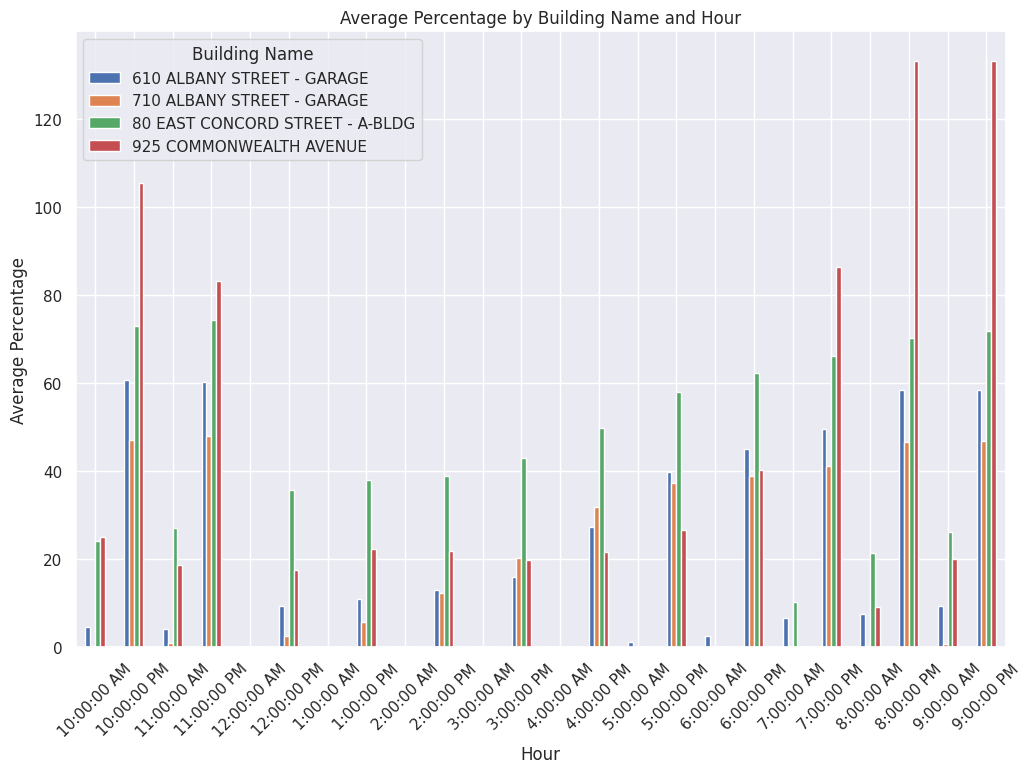

In [ ]:
group = df.groupby(['Building Address', 'Hour 2'])['Percentage'].mean().reset_index()

pivot_df = group.pivot(index='Hour 2', columns='Building Address', values='Percentage')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Percentage by Building Name and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend(title='Building Name')
plt.show()

The percentage, in average, marked generally the highest for the buildings 925 Commonwealth Avenue and 80 East Concord Street - A-BLDG. The lowest average percentages were generally buildings 610 Albany Street - Garage and 710 Albany Street - Garage.


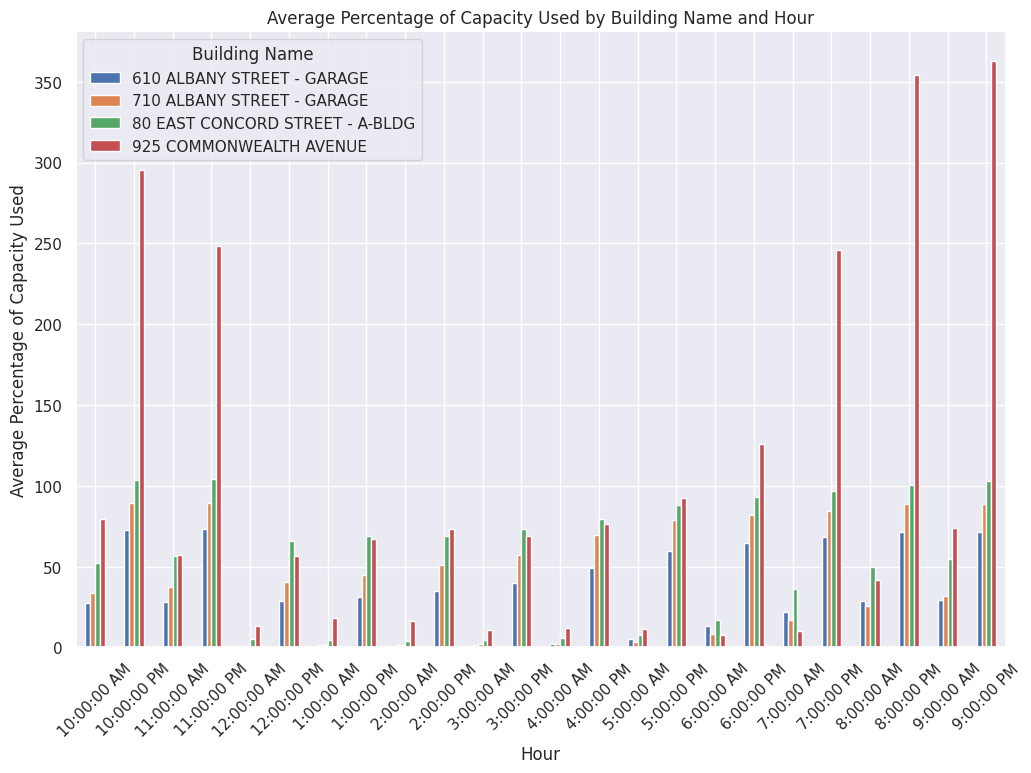

In [ ]:
group = df.groupby(['Building Address', 'Hour 2'])['Percentage of Capacity Used'].mean().reset_index()

pivot_df = group.pivot(index='Hour 2', columns='Building Address', values='Percentage of Capacity Used')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Percentage of Capacity Used by Building Name and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Capacity Used')
plt.xticks(rotation=45)
plt.legend(title='Building Name')
plt.show()

The percentage of capacity used, in average, marked generally the highest for the buildings 925 Commonwealth Avenue and 80 East Concord Street - A-BLDG. The lowest average percentages of capacity used were generally buildings 610 Albany Street - Garage and 710 Albany Street - Garage.


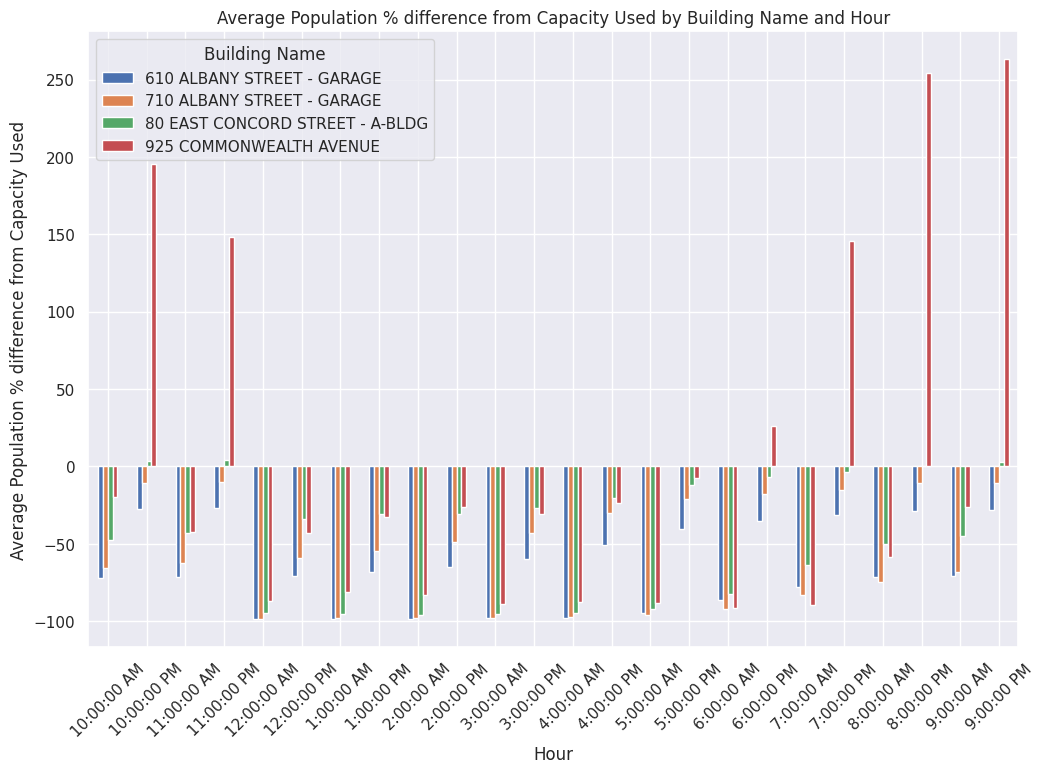

In [ ]:
group = df.groupby(['Building Address', 'Hour 2'])['Population % difference from Capacity'].mean().reset_index()

pivot_df = group.pivot(index='Hour 2', columns='Building Address', values='Population % difference from Capacity')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Population % difference from Capacity Used by Building Name and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Population % difference from Capacity Used')
plt.xticks(rotation=45)
plt.legend(title='Building Name')
plt.show()

The Population % difference from Capacity, in average, marked generally the highest for the buildings 925 Commonwealth Avenue. In general, all of the buildings have negative percentages.


These three percentages, capacity, and population will be used to determine whether specific buildings have high density. If buildings have a high density, this means that installing a water bottle filling station is more prioritized and needed.

### Sixth Dataset: Wifi (BU Wifi Data for Foot Traffic)

##### This dataset contains information regarding the foot traffic on various buildings at Boston University by looking at the Wifi usage.

In [ ]:
df = pd.read_csv("Wifi.csv")
df.head()

,date,hour,building_floor,building_desc,latitude,longitude,building_type,density_cnt,capacity,dc_ratio
0,2021-03-31,1,4,209 BAY STATE ROAD,42.3507,-71.1028,Residential,1,8,0.13
1,2021-03-31,1,2,200-202 BAY STATE ROAD,42.3503,-71.1026,Residential,1,12,0.08
2,2021-03-31,1,2,184 BAY STATE ROAD,42.3503,-71.1019,Residential,1,6,0.17
3,2021-03-31,1,3,190 BAY STATE ROAD,42.3503,-71.1021,Residential,1,9,0.11
4,2021-03-31,1,3,161 BAY STATE ROAD,42.3506,-71.1009,Residential,1,5,0.20


##### First, we will take a look at the columns/variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12314168 entries, 0 to 12314167
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   hour            int64  
 2   building_floor  object 
 3   building_desc   object 
 4   latitude        float64
 5   longitude       float64
 6   building_type   object 
 7   density_cnt     int64  
 8   capacity        int64  
 9   dc_ratio        float64
dtypes: float64(3), int64(3), object(4)
memory usage: 939.5+ MB


Initial Questions To Consider:

This dataset contains 10 columns (variables).

This dataset has 12314168 rows (observations), indicating there are 12314168 Wifi information.

There are both categorical and numerical variables. At quick glance there seems to be same number of numerical variables as categorical variables.

Categorical Variables: building_type, building_floor, hour

Numerical Variables: density_cnt, capacity, dc_ratio

### Data Completion

Information on how much data is provided

In [ ]:
df.isnull().sum()

date                   0
hour                   0
building_floor         0
building_desc          0
latitude          143748
longitude         143748
building_type          0
density_cnt            0
capacity               0
dc_ratio               0
dtype: int64

Some of the data is missing from the dataset.

Columns with missing data points: latitude, longitude

However, even if some of the data point is missing, those two columns are only marking the geographical locations, which are insignificant. In fact, in the data cleaning process, we will drop those columns.

### Data Cleaning

As mentioned, we will delete latitude and longitude columns.

In [ ]:
df.drop(['latitude', 'longitude'],axis=1, inplace=True)
df.head()

,date,hour,building_floor,building_desc,building_type,density_cnt,capacity,dc_ratio
0,2021-03-31,1,4,209 BAY STATE ROAD,Residential,1,8,0.13
1,2021-03-31,1,2,200-202 BAY STATE ROAD,Residential,1,12,0.08
2,2021-03-31,1,2,184 BAY STATE ROAD,Residential,1,6,0.17
3,2021-03-31,1,3,190 BAY STATE ROAD,Residential,1,9,0.11
4,2021-03-31,1,3,161 BAY STATE ROAD,Residential,1,5,0.20


Now that we have cleaned the data set, we will look more about each columns.

In [ ]:
df.describe()

,hour,density_cnt,capacity,dc_ratio
count,1.231417e+07,1.231417e+07,1.231417e+07,1.231417e+07
mean,1.371463e+01,1.110039e+01,5.507822e+01,2.522285e-01
std,6.217759e+00,2.317740e+01,8.962519e+01,4.153055e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,2.000000e+00,4.000000e+00,2.000000e-02
50%,1.400000e+01,4.000000e+00,1.600000e+01,1.300000e-01
75%,1.900000e+01,1.100000e+01,6.800000e+01,3.300000e-01
max,2.300000e+01,1.857000e+03,2.660000e+03,6.403000e+01


Since the data reports the building_desc, we will divide the group based on the Building_desc and hour. Just because there is more data from one location does not mean that it is the most popular building, so we will conduct groupby and calculate average of density_cnt, capacity, and dc_ratio.

We will first look at the number of data points per building address and hour.

In [ ]:
df_groupByBuilding = df.groupby(['building_desc', 'hour']).size().reset_index(name='count')
df_groupByBuilding

,building_desc,hour,count
0,1 BUSWELL STREET,0,251
1,1 BUSWELL STREET,1,688
2,1 BUSWELL STREET,2,929
3,1 BUSWELL STREET,3,1039
4,1 BUSWELL STREET,4,1110
...,...,...,...
5821,985 COMMONWEALTH AVENUE,19,1975
5822,985 COMMONWEALTH AVENUE,20,1963
5823,985 COMMONWEALTH AVENUE,21,1946
5824,985 COMMONWEALTH AVENUE,22,1955


We will now plot a bar graph on the average of capacity, density_cnt, and dc_rato based on the building and hour.

However, there are very many buildings listed on the data, so we will plot it per building.

Before plotting them, we will take a look at the mean capacity, dc_ratio, and density_cnt after grouping by building_desc.


In [ ]:
grouped_df = df.groupby('building_desc')[['capacity', 'dc_ratio', 'density_cnt']].mean()
grouped_df

,capacity,dc_ratio,density_cnt
building_desc,,,
1 BUSWELL STREET,3.755505,0.661792,2.851811
1 UNIVERSITY ROAD,162.754299,0.116412,32.116784
10 BUICK STREET,54.114409,0.275676,15.748614
10 COTTAGE FARM ROAD,0.000000,0.000000,2.288339
10 LENOX STREET,32.831234,0.180870,5.820122
...,...,...,...
96 MOUNTFORT STREET,5.917941,0.517392,3.134094
96-100 CUMMINGTON MALL,44.118191,0.112323,10.943112
975 COMMONWEALTH AVENUE,52.679977,0.185252,9.771536


Here is the graph now.

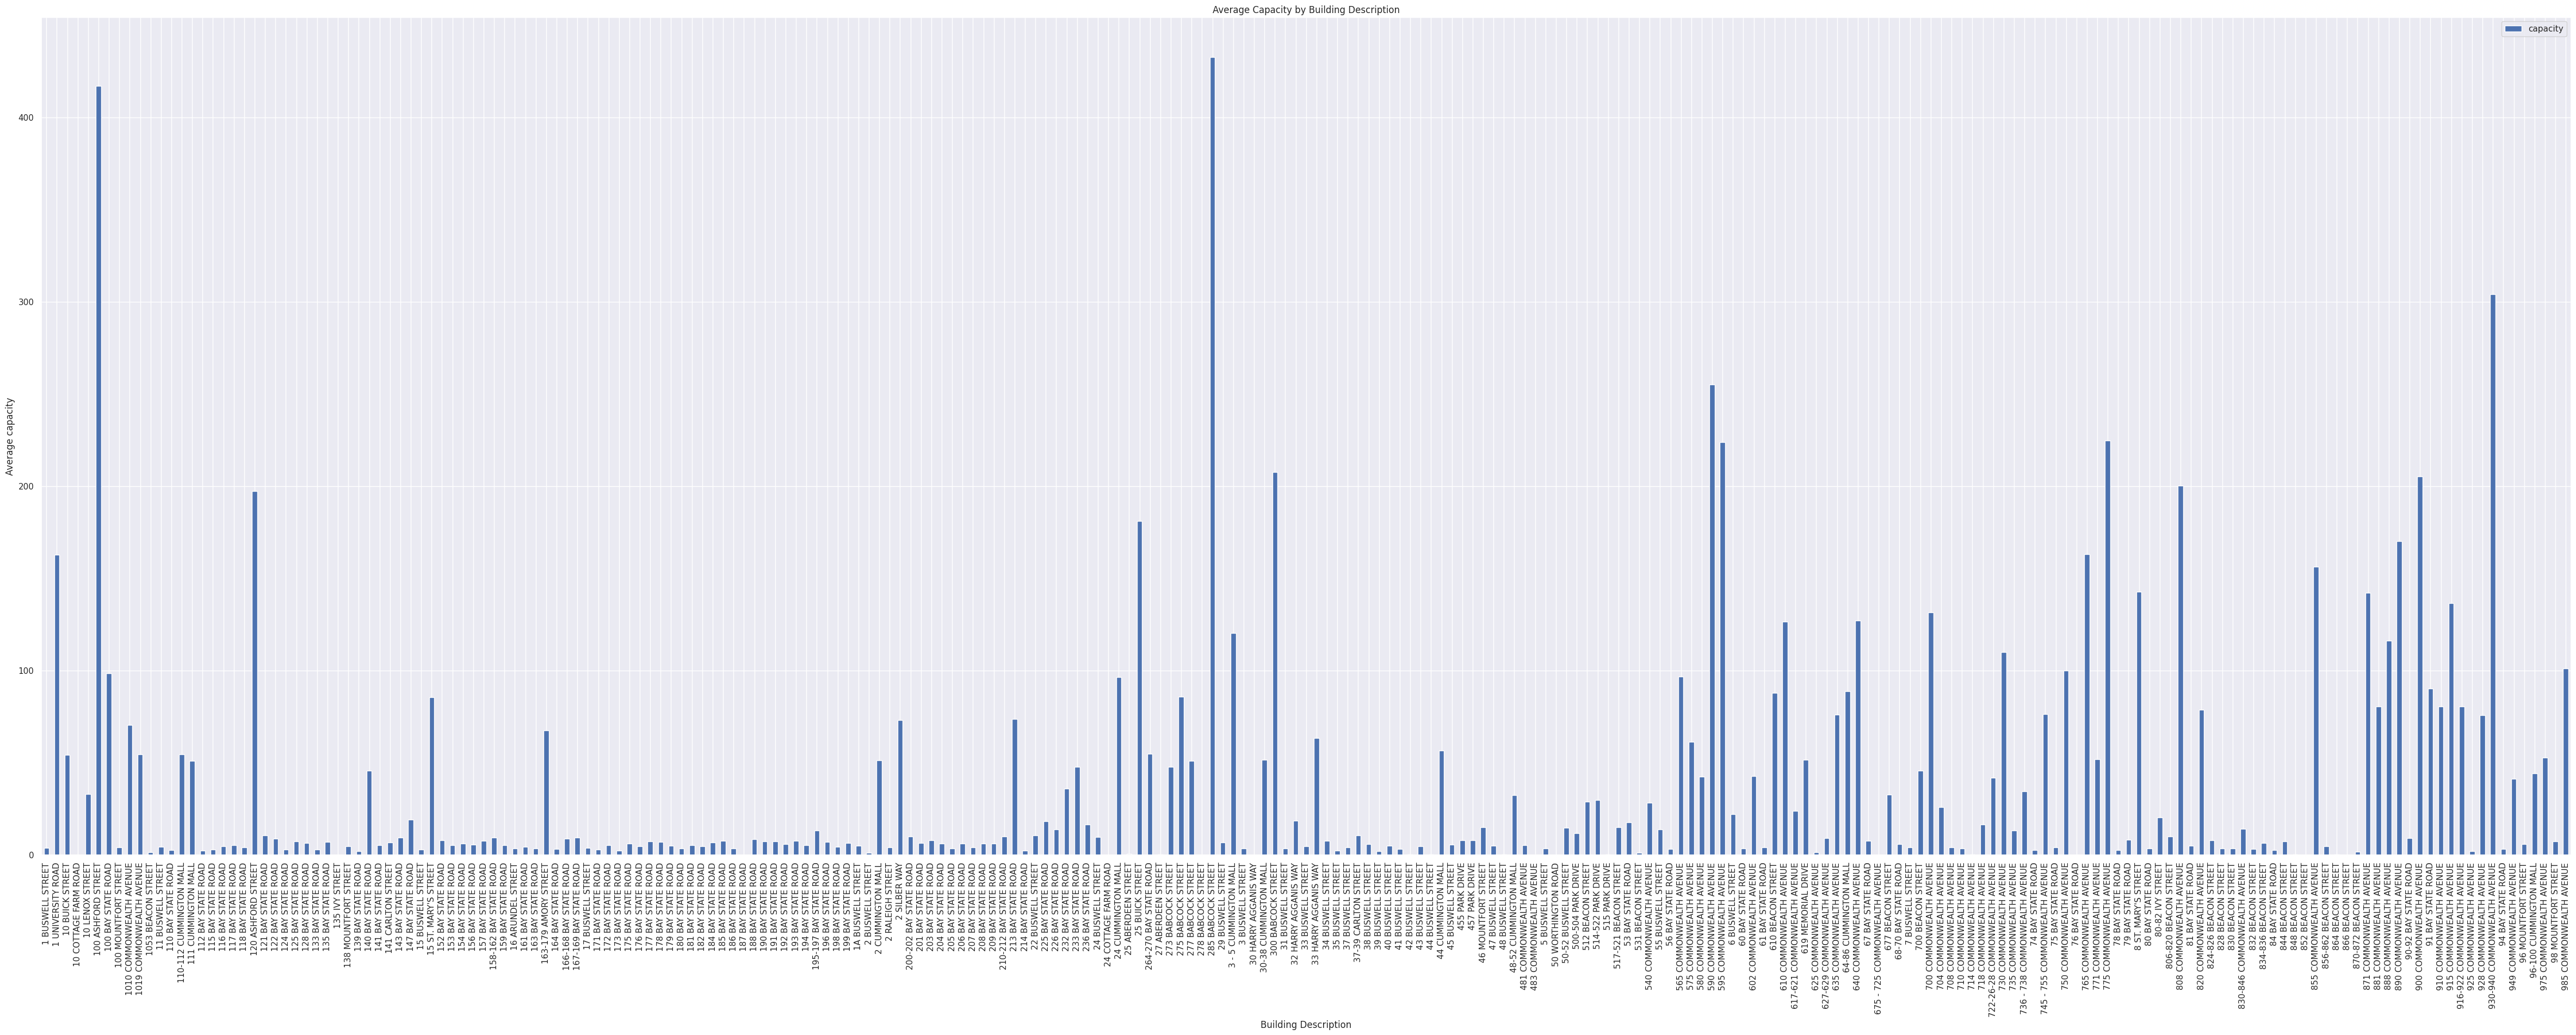

In [ ]:
grouped_df = df.groupby('building_desc')[['capacity']].mean()

grouped_df.plot(kind='bar', figsize=(60, 20))
plt.title('Average Capacity by Building Description')
plt.xlabel('Building Description')
plt.ylabel('Average capacity')
plt.xticks(rotation=90)
plt.show()

From this graph, 285 Babcock Street has the highest average capacity.

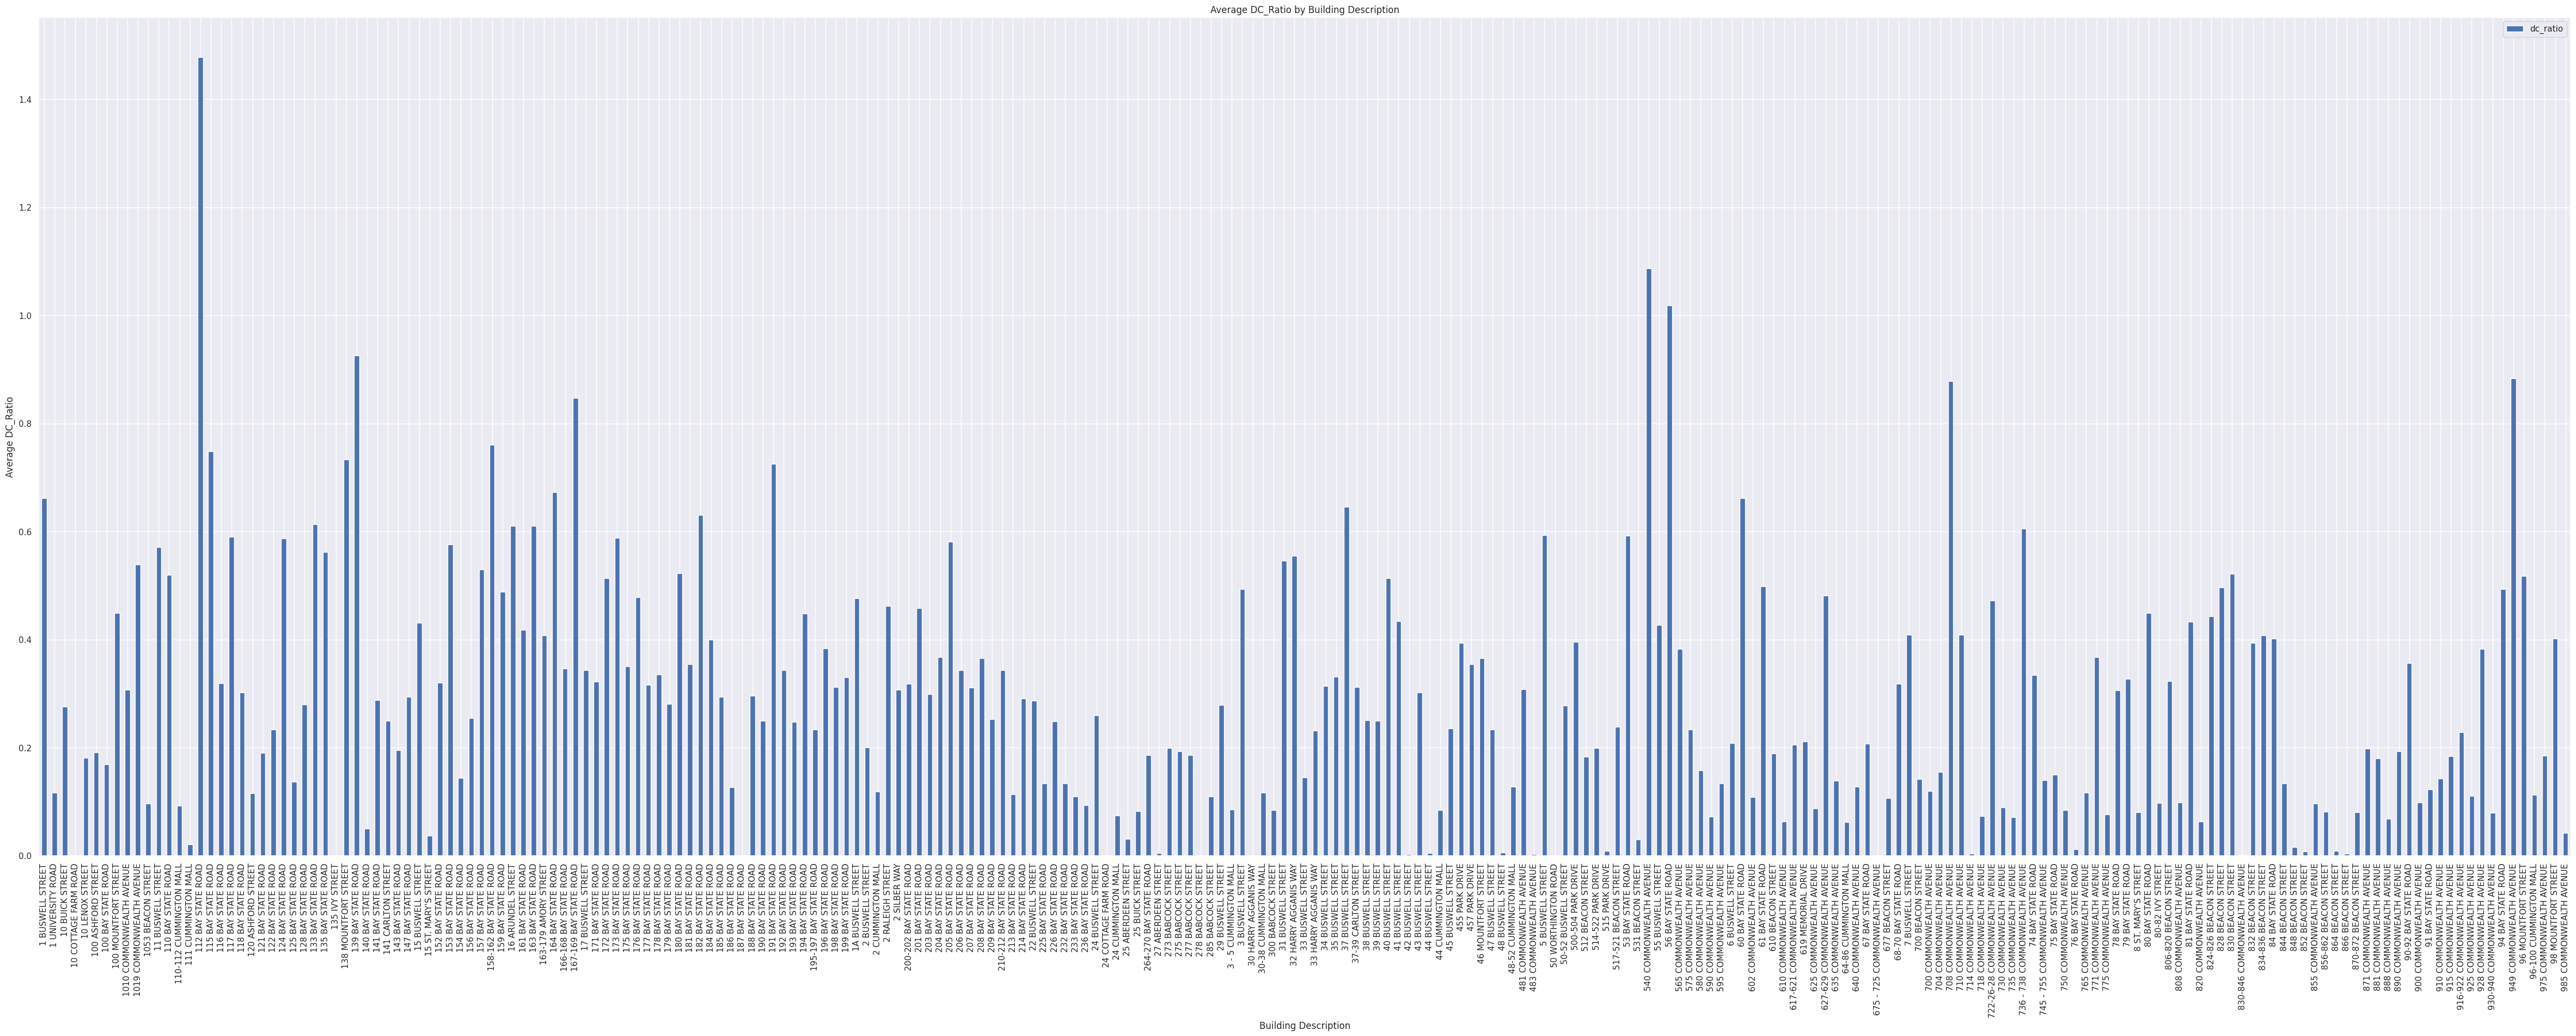

In [ ]:
grouped_df = df.groupby('building_desc')[['dc_ratio']].mean()

grouped_df.plot(kind='bar', figsize=(60, 20))
plt.title('Average DC_Ratio by Building Description')
plt.xlabel('Building Description')
plt.ylabel('Average DC_Ratio')
plt.xticks(rotation=90)
plt.show()

From this graph, 112 Bay State Road has the highest dc_ratio.

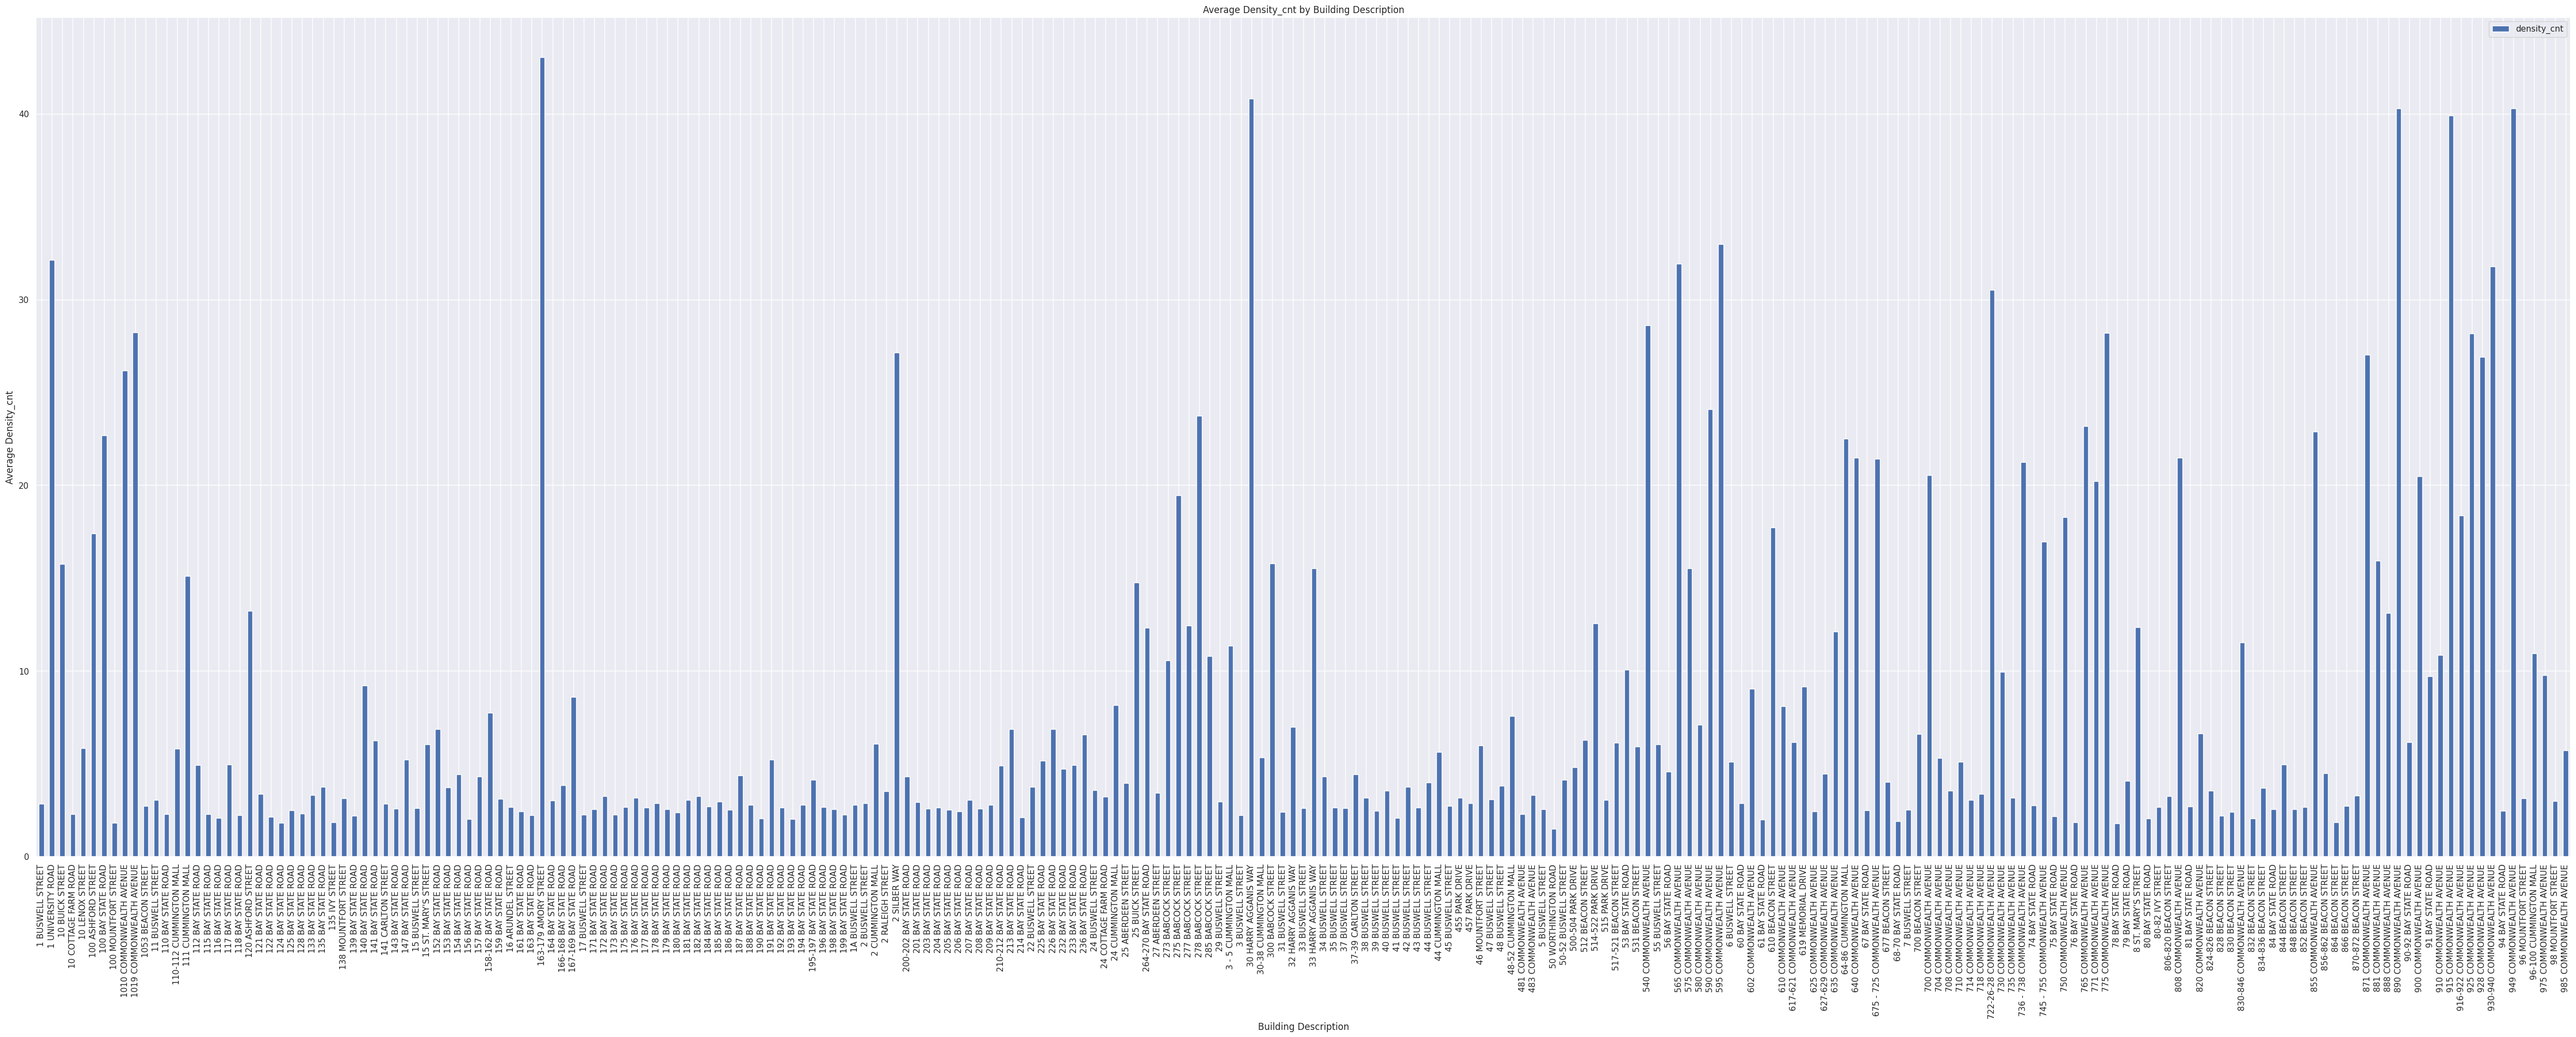

In [ ]:
grouped_df = df.groupby('building_desc')[['density_cnt']].mean()

grouped_df.plot(kind='bar', figsize=(60, 20))
plt.title('Average Density_cnt by Building Description')
plt.xlabel('Building Description')
plt.ylabel('Average Density_cnt')
plt.xticks(rotation=90)
plt.show()

From this graph, 163-179 Amory Street has the highest average density_cnt.

Even though it is difficult to graph, we can still group by the building with the hour to find the average density_cnt, capacity, and dc_ratio.

In [ ]:
grouped_df = df.groupby(['building_desc', 'hour'])[['capacity', 'dc_ratio', 'density_cnt']].mean()
grouped_df

capacity  dc_ratio  density_cnt
building_desc           hour                                  
1 BUSWELL STREET        0      3.872510  0.437251     1.792829
                        1      3.893895  0.493183     2.024709
                        2      3.869752  0.525856     2.172228
                        3      3.881617  0.555043     2.281039
                        4      3.924324  0.573829     2.353153
...                                 ...       ...          ...
985 COMMONWEALTH AVENUE 19    92.450127  0.031797     4.699241
                        20    92.025471  0.031936     4.704534
                        21    91.257451  0.032549     4.788798
                        22    92.223529  0.032900     4.813811
                        23    91.919166  0.033142     4.857143

[5826 rows x 3 columns]

We will use capacity, dc_ratio, and density_cnt to determine whether specific buildings require a water bottle filling station.


# Below Space was used to answer one of the key questions.

In [ ]:
df

,date,hour,building_floor,building_desc,building_type,density_cnt,capacity,dc_ratio
0,2021-03-31,1,4,209 BAY STATE ROAD,Residential,1,8,0.13
1,2021-03-31,1,2,200-202 BAY STATE ROAD,Residential,1,12,0.08
2,2021-03-31,1,2,184 BAY STATE ROAD,Residential,1,6,0.17
3,2021-03-31,1,3,190 BAY STATE ROAD,Residential,1,9,0.11
4,2021-03-31,1,3,161 BAY STATE ROAD,Residential,1,5,0.20
...,...,...,...,...,...,...,...,...
12314163,2021-03-31,1,3,210-212 BAY STATE ROAD,Residential,1,12,0.08
12314164,2021-03-31,1,3,207 BAY STATE ROAD,Residential,2,6,0.33
12314165,2021-03-31,1,4,627-629 COMMONWEALTH AVENUE,Residential,2,9,0.22
12314166,2021-03-31,1,3,627-629 COMMONWEALTH AVENUE,Residential,1,10,0.10


In [ ]:
dfWifi = df

In [ ]:
dfGeosptial = pd.read_csv("geospatial.csv")
dfGeosptial

,BUILDING,FLOOR,TOTAL STATIONS/BUILDING
0,1019 Commonwealth,1,1
1,110-112 Cummington,2,1
2,111 Cummington,1,4
3,111 Cummington,1,4
4,111 Cummington,0,4
...,...,...,...
195,Yawkey,1,6
196,Yawkey,3,6
197,Yawkey,4,6
198,Yawkey,5,6


In [ ]:
dfHighVolume = pd.read_csv('High Volume Event Spaces.csv')
dfHighVolume

,Room_Name,Address,Floor,Current,Installed_Time,Notes,Candidacy
0,Agganis Arena Burke Club Room,925 Commonwealth Avenue,2nd Floor,0.0,NaN,"casual catered events, high liklihood of using...",Maybe
1,Agganis Arena Friends of Hockey Lounge,925 Commonwealth Avenue,1st Floor,0.0,NaN,"casual catered events, high liklihood of using...",Maybe
2,Case Center Eilberg Lounge,285 Babcock Street,3rd Floor,-1.0,NaN,use of the space is limited; there are fillers...,More_research_needed
3,College of Arts & Sciences Classrooms,675-725 Commonwealth Avenue,NaN,NaN,complete FY23,There are a bunch already down the hallways; 4...,Enough
4,College of Communication Lounge,640 Commowealth Avenue,1st Floor,1.0,NaN,hallway by room 105,More_research_needed
5,College of General Studies Gilbane Lounge,871 Commonwealth Avenue,1st Floor,NaN,complete FY23,one on each floor,Enough
6,College of General Studies Katzenberg Lounge,871 Commonwealth Avenue,4th Floor,NaN,complete FY23,NaN,Enough
7,College of General Studies Sleeper Auditorium,871 Commonwealth Avenue,1st Floor,NaN,complete FY23,NaN,Enough
8,Dahod Family Alumni Center,225 Bay State Road,1st Floor,-1.0,NaN,There's one in the space btw Castle and Admiss...,Enough
9,George Sherman Union Alley,775 Commonwealth Avenue,Basement,1.0,NaN,The space is used heavily for dance/performanc...,Enough


In [ ]:
dfBottleFillers = pd.read_csv("Bottle Fillers Inventory.csv")
dfBottleFillers['Address'] = dfBottleFillers['Address A'].astype(str) + ' ' + dfBottleFillers['Address B'].astype(str)
dfBottleFillers.drop(['Address A', 'Address B'], axis=1, inplace=True)
dfBottleFillers['Address'].unique()

array(['100 Ashford St', '120 Ashford St', "8 St. Mary's Street",
       '273 Babcock St', '275 Babcock St', '277 Babcock St',
       '285 Babcock St', '300 Babcock St', '91 Bay State Road',
       '100 Bay State Road', '140 Bay State Road', '156 Bay State Road',
       '196 Bay State Road', '226 Bay State Road', '233 Bay State Road',
       '264 Bay State Road', '270 Bay State Road', '512 Beacon St',
       '517 Beacon St', '610 Beacon St', '25 Buick St',
       '565 Commonwealth Ave', '575 Commonwealth Ave',
       '590 Commonwealth Ave', '595 Commonwealth Ave', '2 Silber Way',
       '610 Commonwealth Ave', '621 Commonwealth Ave',
       '635 Commonwealth Ave', '640 Commonwealth Ave',
       '675 Commonwealth Ave', '685 Commonwealth Ave',
       '700 Commonwealth Ave', '705 Commonwealth Ave',
       '725 Commonwealth Ave', '735 Commonwealth Ave',
       '745 Commonwealth Ave', '750 Commonwealth Ave',
       '765 Commonwealth Ave', '767 Commonwealth Ave',
       '771 Commonwealth Ave

In [ ]:
dfWifi["building_desc"].unique()

array(['209 BAY STATE ROAD', '200-202 BAY STATE ROAD',
       '184 BAY STATE ROAD', '190 BAY STATE ROAD', '161 BAY STATE ROAD',
       '163 BAY STATE ROAD', '159 BAY STATE ROAD',
       '771 COMMONWEALTH AVENUE', '775 COMMONWEALTH AVENUE',
       '1 UNIVERSITY ROAD', '745 - 755 COMMONWEALTH AVENUE',
       '264-270 BAY STATE ROAD', '6 BUSWELL STREET', '22 BUSWELL STREET',
       '96 MOUNTFORT STREET', '806-820 BEACON STREET',
       '844 BEACON STREET', '46 MOUNTFORT STREET',
       '856-862 BEACON STREET', '870-872 BEACON STREET',
       '824-826 BEACON STREET', '24 BUSWELL STREET', '16 ARUNDEL STREET',
       '834-836 BEACON STREET', '830 BEACON STREET',
       '98 MOUNTFORT STREET', '635 COMMONWEALTH AVENUE', '2 SILBER WAY',
       '595 COMMONWEALTH AVENUE', '285 BABCOCK STREET',
       '120 ASHFORD STREET', '100 ASHFORD STREET',
       '590 COMMONWEALTH AVENUE', '722-26-28 COMMONWEALTH AVENUE',
       '730 COMMONWEALTH AVENUE', "8 ST. MARY'S STREET",
       '1010 COMMONWEALTH AVENU

In [ ]:
dfGeosptial["BUILDING"].unique()

array(['1019 Commonwealth', '110-112 Cummington', '111 Cummington',
       '154 Bay State Road', '156 Bay State Road', '196 Bay State Road',
       '2 Cummington', '25 Buick', '270 Bay State Road', '300 Babcock',
       '33 Harry Agganis', '36 Cummington', '48 Cummington',
       '5 Cummington', '517 Beacon', '565 Commonwealth', '64 Cummington',
       '712 Beacon', '881 Commonwealth', '96 Cummington', 'Admissions',
       'Booth', 'BUA', 'CAS', 'Case Center', 'CELOP', 'CFA', 'CGS',
       'Claflin', 'COM', 'Danielson', 'EMA', 'ENG', 'Fitrec',
       'Fuller Building', 'GRS', 'GSU', 'Hojo', 'Kilachand',
       'Law Auditorium', 'Law', 'Linguistics', 'Marcom', 'Marsh',
       'Metcalf', 'Mugar', 'Myles Annex', 'Myles Standish', 'Photonics',
       'Questrom', 'Rich', 'Sargent', 'SHA', 'Sleeper', 'SSW', 'STH',
       'Stone', 'Towers', 'Tsai', 'TTC', 'Warren', 'Wheelock', 'Yawkey'],
      dtype=object)

In [ ]:
grouped_df = df[df['building_desc'] == '1019 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 1019 COMMONWEALTH AVENUE")


On an average day, 1304 people benefitted from the existing water bottle station at 1019 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '111 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 111 CUMMINGTON MALL")


On an average day, 1236 people benefitted from the existing water bottle station at 111 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '110-112 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 110-112 CUMMINGTON MALL")


On an average day, 1357 people benefitted from the existing water bottle station at 110-112 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '154 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 154 BAY STATE ROAD")


On an average day, 136 people benefitted from the existing water bottle station at 154 BAY STATE ROAD


In [ ]:
grouped_df = df[df['building_desc'] == '156 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 156 BAY STATE ROAD")


On an average day, 126 people benefitted from the existing water bottle station at 156 BAY STATE ROAD


In [ ]:
grouped_df = df[df['building_desc'] == '196 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 196 BAY STATE ROAD")


On an average day, 171 people benefitted from the existing water bottle station at 196 BAY STATE ROAD


In [ ]:
grouped_df = df[df['building_desc'] == '2 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 2 CUMMINGTON MALL")


On an average day, 1246 people benefitted from the existing water bottle station at 2 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '25 BUICK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 25 BUICK STREET")


On an average day, 4347 people benefitted from the existing water bottle station at 25 BUICK STREET


In [ ]:
grouped_df = df[df['building_desc'] == '264-270 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 270 BAY STATE ROAD")


On an average day, 1338 people benefitted from the existing water bottle station at 270 BAY STATE ROAD


In [ ]:
grouped_df = df[df['building_desc'] == '300 BABCOCK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 300 BABCOCK STREET")


On an average day, 4930 people benefitted from the existing water bottle station at 300 BABCOCK STREET


In [ ]:
grouped_df = df[df['building_desc'] == '33 HARRY AGGANIS WAY']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 33 HARRY AGGANIS WAY")


On an average day, 1524 people benefitted from the existing water bottle station at 33 HARRY AGGANIS WAY


In [ ]:
grouped_df = df[df['building_desc'] == '30-38 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 36 CUMMINGTON MALL")


On an average day, 1295 people benefitted from the existing water bottle station at 36 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '48-52 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 48 CUMMINGTON MALL")


On an average day, 770 people benefitted from the existing water bottle station at 48 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '3 - 5 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 5 CUMMINGTON MALL")


On an average day, 2956 people benefitted from the existing water bottle station at 5 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '96-100 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 96 CUMMINGTON MALL")


On an average day, 1139 people benefitted from the existing water bottle station at 96 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '64-86 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 64 CUMMINGTON MALL")


On an average day, 2316 people benefitted from the existing water bottle station at 64 CUMMINGTON MALL


In [ ]:
grouped_df = df[df['building_desc'] == '565 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 565 COMMONWEALTH AVENUE")


On an average day, 2375 people benefitted from the existing water bottle station at 565 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '881 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 881 COMMONWEALTH AVENUE")


On an average day, 1968 people benefitted from the existing water bottle station at 881 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '517-521 BEACON STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 517 BEACON STREET")


On an average day, 365 people benefitted from the existing water bottle station at 517 BEACON STREET


In [ ]:
grouped_df = df[df['building_desc'] == '700 BEACON STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 712 BEACON STREET")


On an average day, 1117 people benefitted from the existing water bottle station at 712 BEACON STREET


In [ ]:
grouped_df = df[df['building_desc'] == '233 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 233 BAY STATE ROAD (Admissions)")


On an average day, 1120 people benefitted from the existing water bottle station at 233 BAY STATE ROAD (Admissions)


In [ ]:
grouped_df = df[df['building_desc'] == '820 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 820 COMMONWEALTH AVENUE (Booth)")


On an average day, 1967 people benefitted from the existing water bottle station at 820 COMMONWEALTH AVENUE (Booth)


In [ ]:
grouped_df = df[df['building_desc'] == '1 UNIVERSITY ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 1 UNIVERSITY ROAD (BUA)")


On an average day, 3915 people benefitted from the existing water bottle station at 1 UNIVERSITY ROAD (BUA)


In [ ]:
grouped_df = df[df['building_desc'] == '675 - 725 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 675 - 725 COMMONWEALTH AVENUE (CAS)")


On an average day, 0 people benefitted from the existing water bottle station at 675 - 725 COMMONWEALTH AVENUE (CAS)


In [ ]:
grouped_df = df[df['building_desc'] == '285 BABCOCK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 285 BABCOCK STREET (Case Center)")


On an average day, 9534 people benefitted from the existing water bottle station at 285 BABCOCK STREET (Case Center)


In [ ]:
grouped_df = df[df['building_desc'] == '890 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 890 COMMONWEALTH AVENUE (CELOP)")


On an average day, 4352 people benefitted from the existing water bottle station at 890 COMMONWEALTH AVENUE (CELOP)


In [ ]:
grouped_df = df[df['building_desc'] == '855 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 855 COMMONWEALTH AVENUE (CFA)")


On an average day, 3734 people benefitted from the existing water bottle station at 855 COMMONWEALTH AVENUE (CFA)


In [ ]:
grouped_df = df[df['building_desc'] == '871 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 871 COMMONWEALTH AVENUE")


On an average day, 3381 people benefitted from the existing water bottle station at 871 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '273 BABCOCK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 273 BABCOCK STREET (Clafllin)")


On an average day, 1151 people benefitted from the existing water bottle station at 273 BABCOCK STREET (Clafllin)


In [ ]:
grouped_df = df[df['building_desc'] == '640 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 640 COMMONWEALTH AVENUE (COM)")


On an average day, 3112 people benefitted from the existing water bottle station at 640 COMMONWEALTH AVENUE (COM)


In [ ]:
grouped_df = df[df['building_desc'] == '512 BEACON STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 512 BEACON STREET (Danielson)")


On an average day, 691 people benefitted from the existing water bottle station at 512 BEACON STREET (Danielson)


In [ ]:
grouped_df = df[df['building_desc'] == '730 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 730 COMMONWEALTH AVENUE (EMA)")


On an average day, 2642 people benefitted from the existing water bottle station at 730 COMMONWEALTH AVENUE (EMA)


In [ ]:
grouped_df = df[df['building_desc'] == '44 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 44 CUMMINGTON MALL (ENG)")


On an average day, 1403 people benefitted from the existing water bottle station at 44 CUMMINGTON MALL (ENG)


In [ ]:
grouped_df = df[df['building_desc'] == '915 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 915 COMMONWEALTH AVENUE (Fitrec)")


On an average day, 3274 people benefitted from the existing water bottle station at 915 COMMONWEALTH AVENUE (Fitrec)


In [ ]:
grouped_df = df[df['building_desc'] == '808 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 808 COMMONWEALTH AVENUE (Fuller Building)")


On an average day, 4916 people benefitted from the existing water bottle station at 808 COMMONWEALTH AVENUE (Fuller Building)


In [ ]:
grouped_df = df[df['building_desc'] == '704 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 704 COMMONWEALTH AVENUE (GRS)")


On an average day, 613 people benefitted from the existing water bottle station at 704 COMMONWEALTH AVENUE (GRS)


In [ ]:
grouped_df = df[df['building_desc'] == '775 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 775 COMMONWEALTH AVENUE (GSU)")


On an average day, 5633 people benefitted from the existing water bottle station at 775 COMMONWEALTH AVENUE (GSU)


In [ ]:
grouped_df = df[df['building_desc'] == '575 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 575 COMMONWEALTH AVENUE (HOJO)")


On an average day, 1476 people benefitted from the existing water bottle station at 575 COMMONWEALTH AVENUE (HOJO)


In [ ]:
grouped_df = df[df['building_desc'] == '91 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 91 BAY STATE ROAD (Kilachand)")


On an average day, 2148 people benefitted from the existing water bottle station at 91 BAY STATE ROAD (Kilachand)


In [ ]:
grouped_df = df[df['building_desc'] == '765 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 765 COMMONWEALTH AVENUE (LAW)")


On an average day, 4379 people benefitted from the existing water bottle station at 765 COMMONWEALTH AVENUE (LAW)


In [ ]:
grouped_df = df[df['building_desc'] == '617-621 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 621 COMMONWEALTH AVENUE (Linguistics)")


On an average day, 574 people benefitted from the existing water bottle station at 621 COMMONWEALTH AVENUE (Linguistics)


In [ ]:
grouped_df = df[df['building_desc'] == '985 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 985 COMMONWEALTH AVENUE (Marcom)")


On an average day, 2566 people benefitted from the existing water bottle station at 985 COMMONWEALTH AVENUE (Marcom)


In [ ]:
grouped_df = df[df['building_desc'] == '735 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 735 COMMONWEALTH AVENUE (Marsh)")


On an average day, 414 people benefitted from the existing water bottle station at 735 COMMONWEALTH AVENUE (Marsh)


In [ ]:
grouped_df = df[df['building_desc'] == '590 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 590 COMMONWEALTH AVENUE (Metcalf)")


On an average day, 6226 people benefitted from the existing water bottle station at 590 COMMONWEALTH AVENUE (Metcalf)


In [ ]:
grouped_df = df[df['building_desc'] == '771 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 771 COMMONWEALTH AVENUE (Mugar)")


On an average day, 1310 people benefitted from the existing water bottle station at 771 COMMONWEALTH AVENUE (Mugar)


In [ ]:
grouped_df = df[df['building_desc'] == '610 BEACON STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 610 BEACON STREET (Myles Standish)")


On an average day, 2115 people benefitted from the existing water bottle station at 610 BEACON STREET (Myles Standish)


In [ ]:
grouped_df = df[df['building_desc'] == "8 ST. MARY'S STREET"]
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 8 ST. MARY'S STREET (Photonics)")


On an average day, 3498 people benefitted from the existing water bottle station at 8 ST. MARY'S STREET (Photonics)


In [ ]:
grouped_df = df[df['building_desc'] == '595 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 595 COMMONWEALTH AVENUE (Questrom)")


On an average day, 5501 people benefitted from the existing water bottle station at 595 COMMONWEALTH AVENUE (Questrom)


In [ ]:
grouped_df = df[df['building_desc'] == '277 BABCOCK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 277 BABCOCK STREET (Rich)")


On an average day, 1238 people benefitted from the existing water bottle station at 277 BABCOCK STREET (Rich)


In [ ]:
grouped_df = df[df['building_desc'] == '635 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 635 COMMONWEALTH AVENUE (Sargent)")


On an average day, 1846 people benefitted from the existing water bottle station at 635 COMMONWEALTH AVENUE (Sargent)


In [ ]:
grouped_df = df[df['building_desc'] == '928 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 928 COMMONWEALTH AVENUE (SHA)")


On an average day, 1867 people benefitted from the existing water bottle station at 928 COMMONWEALTH AVENUE (SHA)


In [ ]:
grouped_df = df[df['building_desc'] == '275 BABCOCK STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 275 BABCOCK STREET (Sleeper)")


On an average day, 2058 people benefitted from the existing water bottle station at 275 BABCOCK STREET (Sleeper)


In [ ]:
grouped_df = df[df['building_desc'] == '745 - 755 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 745 COMMONWEALTH AVENUE (STH)")


On an average day, 1971 people benefitted from the existing water bottle station at 745 COMMONWEALTH AVENUE (STH)


In [ ]:
grouped_df = df[df['building_desc'] == '140 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 140 BAY STATE ROAD (TOWERS)")


On an average day, 1089 people benefitted from the existing water bottle station at 140 BAY STATE ROAD (TOWERS)


In [ ]:
grouped_df = df[df['building_desc'] == '100 ASHFORD STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 100 ASHFORD STREET (TTC)")


On an average day, 11043 people benefitted from the existing water bottle station at 100 ASHFORD STREET (TTC)


In [ ]:
grouped_df = df[df['building_desc'] == '700 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 700 COMMONWEALTH AVENUE (WARREN)")


On an average day, 3157 people benefitted from the existing water bottle station at 700 COMMONWEALTH AVENUE (WARREN)


In [ ]:
grouped_df = df[df['building_desc'] == '2 SILBER WAY']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 2 SILBER WAY (WHEELOCK)")


On an average day, 1778 people benefitted from the existing water bottle station at 2 SILBER WAY (WHEELOCK)


In [ ]:
grouped_df = df[df['building_desc'] == '100 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 100 BAY STATE ROAD (YAWKEY)")


On an average day, 2390 people benefitted from the existing water bottle station at 100 BAY STATE ROAD (YAWKEY)


In [ ]:
grouped_df = df[df['building_desc'] == '225 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 255 BAY STATE ROAD (The CASTLE)")


On an average day, 474 people benefitted from the existing water bottle station at 255 BAY STATE ROAD (The CASTLE)


In [ ]:
grouped_df = df[df['building_desc'] == '120 ASHFORD STREET']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 120 ASHFORD STREET")


On an average day, 5016 people benefitted from the existing water bottle station at 120 ASHFORD STREET


In [ ]:
grouped_df = df[df['building_desc'] == '226 BAY STATE ROAD']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 226 BAY STATE ROAD")


On an average day, 323 people benefitted from the existing water bottle station at 226 BAY STATE ROAD


In [ ]:
grouped_df = df[df['building_desc'] == '610 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 610 COMMONWEALTH AVENUE")


On an average day, 3023 people benefitted from the existing water bottle station at 610 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '750 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 750 COMMONWEALTH AVENUE")


On an average day, 2131 people benefitted from the existing water bottle station at 750 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '925 COMMONWEALTH AVENUE']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 925 COMMONWEALTH AVENUE")


On an average day, 44 people benefitted from the existing water bottle station at 925 COMMONWEALTH AVENUE


In [ ]:
grouped_df = df[df['building_desc'] == '24 CUMMINGTON MALL']
grouped_df = grouped_df.groupby(['building_desc', 'hour'])[['capacity']].mean().sum()
print(f"On an average day, {int(grouped_df)} people benefitted from the existing water bottle station at 24 CUMMINGTON MALL")


On an average day, 2288 people benefitted from the existing water bottle station at 24 CUMMINGTON MALL


Water Bottle Filling Stations that Do Not Have WiFi Data
1. Myles Annex -- 632 Beacon Street
2. SSW -- 264 Bay State Road
3. Stone -- 675 Commonwealth Avenue
4. Tsai -- 685 Commonwealth Avenue
5. 68 Cummington Mall